In [ ]:
!python -m spacy download en_core_web_lg # Restart Runtime

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-11 10:53:20.619142: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-11 10:53:23.090138: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-11 10:53:23.090332: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open share

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
# Installations
import sys
if 'google.colab' in sys.modules:
    !pip install emoji --upgrade
    !pip install pandas-profiling==2.*
    !pip install plotly==4.*
    !python -m spacy download en_core_web_lg
    !pip install pyldavis
    !pip install gensim
    !pip install nltk
    !pip install chart_studio
    !pip install --upgrade autopep8
    !pip install vaderSentiment
    !pip install datatable
    

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=c0abb0871f1b7fa7c272e37f58014fa9998d76bd4f6f21155b73280d2ee46ca3
  Stored in directory: /root/.cache/pip/wheels/9a/b8/0f/f580817231cbf59f6ade9fd132ff60ada1de9f7dc85521f857
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.2/245.2 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 KB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 KB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Required Libraries

#Base and Cleaning 
import json
import requests
import pandas as pd
import numpy as np
import emoji
import regex
import re
import string
import pandas as pd
from collections import Counter
from random import seed

#Visualizations
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
import pyLDAvis
import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools as tls
import matplotlib.pyplot as plt
import pyLDAvis.gensim_models as gensimvis

#Natural Language Processing (NLP)
import spacy
import gensim
from spacy.tokenizer import Tokenizer
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim import models
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
import nltk 
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
nltk.download('stopwords')
from nltk.corpus import stopwords


/usr/local/lib/python3.9/dist-packages/gensim/matutils.py:23: DeprecationWarning: Please use `triu` from the `scipy.linalg` namespace, the `scipy.linalg.special_matrices` namespace is deprecated.
  from scipy.linalg.special_matrices import triu
/usr/local/lib/python3.9/dist-packages/gensim/corpora/dictionary.py:11: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping, defaultdict
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Load the data
%cd /content/drive/MyDrive/Colab_Notebooks
df_example = pd.read_csv('SagradaFamilia.csv')

/content/drive/MyDrive/Colab_Notebooks


In [ ]:
df_example

Unnamed: 0           id      username                   location  \
0            1123  rn433412187    Neema46664  San Francisco, California   
1            1124  rn433409288        dakane       Pacifica, California   
2            1125  rn433400569      Laurel M                        NaN   
3            1126  rn433394480        kaci99                San Jose CA   
4            1127  rn433387404        suzmca         Nipomo, California   
...           ...          ...           ...                        ...   
43529       44886  rn112573495      BrianUSN         San Antonio, Texas   
43530       44887  rn112166337    Bedazzle76     Mumbai (Bombay), India   
43531       44888  rn111416892     rspeters7           Cincinnati, Ohio   
43532       44889  rn110378448  stripeyshirt      Leeds, United Kingdom   
43533       44890  rn110339693    richnterry      Jacksonville, Florida   

            userop                                        quote  rating  \
0      180 reviews                             Amazing amazing        5   
1       10 reviews                  Impressive but very crowded       3   
2       23 reviews            Like no other cathedral in europe       5   
3       21 reviews                               Awe inspiring.       4   
4      292 reviews                                    Beautiful       5   
...            ...                                          ...     ...   
43529   33 reviews   Unique Cathedral - A Must See in Barcelona       5   
43530   71 reviews                          Absolutely Stunning       5   
43531   52 reviews                        Awe Inspiring Beauty!       5   
43532   17 reviews  An astonishing piece of church architecture       5   
43533   64 reviews          If You Do Nothing Else In Barcelona       5   

             date                                      reviewnospace  page  \
0      2016-10-31  Go see it - you won't regret and best advice, ...   113   
1      2016-10-31  I found the Sagrada Familia to be impressive b...   113   
2      2016-10-31  This is a must see in Barcelona, and crowded a...   113   
3      2016-10-31  Amazing. Of course this is a must when in Barc...   113   
4      2016-10-31  We purchased tickets on the internet to see th...   113   
...           ...                                                ...   ...   
43529  2011-06-10  The Cathedral is not near many other big attra...  4488   
43530  2011-06-08  If you have to do one thing in Barcelona, it h...  4488   
43531  2011-06-04  From our Hotel we took the bus downtown to Bar...  4488   
43532  2011-05-29  Go to see the Cathedral before you've seen any...  4488   
43533  2011-05-29  First, whatever you do book your tickets on-li...  4488   

                                            titleopinion  
0      Amazing amazing . Go see it - you won't regret...  
1      Impressive but very crowded. I found the Sagra...  
2      Like no other cathedral in europe. This is a m...  
3      Awe inspiring.. Amazing. Of course this is a m...  
4      Beautiful. We purchased tickets on the interne...  
...                                                  ...  
43529  Unique Cathedral - A Must See in Barcelona. Th...  
43530  Absolutely Stunning. If you have to do one thi...  
43531  Awe Inspiring Beauty!. From our Hotel we took ...  
43532  An astonishing piece of church architecture. G...  
43533  If You Do Nothing Else In Barcelona. First, wh...  

[43534 rows x 11 columns]

In [ ]:
# Calculate numer of words per review
df_example["Numero de palabras"] = df_example["titleopinion"].apply(lambda n: len(n.split()))
df_example

Unnamed: 0           id      username                   location  \
0            1123  rn433412187    Neema46664  San Francisco, California   
1            1124  rn433409288        dakane       Pacifica, California   
2            1125  rn433400569      Laurel M                        NaN   
3            1126  rn433394480        kaci99                San Jose CA   
4            1127  rn433387404        suzmca         Nipomo, California   
...           ...          ...           ...                        ...   
43529       44886  rn112573495      BrianUSN         San Antonio, Texas   
43530       44887  rn112166337    Bedazzle76     Mumbai (Bombay), India   
43531       44888  rn111416892     rspeters7           Cincinnati, Ohio   
43532       44889  rn110378448  stripeyshirt      Leeds, United Kingdom   
43533       44890  rn110339693    richnterry      Jacksonville, Florida   

            userop                                        quote  rating  \
0      180 reviews                             Amazing amazing        5   
1       10 reviews                  Impressive but very crowded       3   
2       23 reviews            Like no other cathedral in europe       5   
3       21 reviews                               Awe inspiring.       4   
4      292 reviews                                    Beautiful       5   
...            ...                                          ...     ...   
43529   33 reviews   Unique Cathedral - A Must See in Barcelona       5   
43530   71 reviews                          Absolutely Stunning       5   
43531   52 reviews                        Awe Inspiring Beauty!       5   
43532   17 reviews  An astonishing piece of church architecture       5   
43533   64 reviews          If You Do Nothing Else In Barcelona       5   

             date                                      reviewnospace  page  \
0      2016-10-31  Go see it - you won't regret and best advice, ...   113   
1      2016-10-31  I found the Sagrada Familia to be impressive b...   113   
2      2016-10-31  This is a must see in Barcelona, and crowded a...   113   
3      2016-10-31  Amazing. Of course this is a must when in Barc...   113   
4      2016-10-31  We purchased tickets on the internet to see th...   113   
...           ...                                                ...   ...   
43529  2011-06-10  The Cathedral is not near many other big attra...  4488   
43530  2011-06-08  If you have to do one thing in Barcelona, it h...  4488   
43531  2011-06-04  From our Hotel we took the bus downtown to Bar...  4488   
43532  2011-05-29  Go to see the Cathedral before you've seen any...  4488   
43533  2011-05-29  First, whatever you do book your tickets on-li...  4488   

                                            titleopinion  Numero de palabras  
0      Amazing amazing . Go see it - you won't regret...                  29  
1      Impressive but very crowded. I found the Sagra...                  40  
2      Like no other cathedral in europe. This is a m...                  27  
3      Awe inspiring.. Amazing. Of course this is a m...                  36  
4      Beautiful. We purchased tickets on the interne...                  83  
...                                                  ...                 ...  
43529  Unique Cathedral - A Must See in Barcelona. Th...                 164  
43530  Absolutely Stunning. If you have to do one thi...                 163  
43531  Awe Inspiring Beauty!. From our Hotel we took ...                 155  
43532  An astonishing piece of church architecture. G...                 183  
43533  If You Do Nothing Else In Barcelona. First, wh...                 258  

[43534 rows x 12 columns]

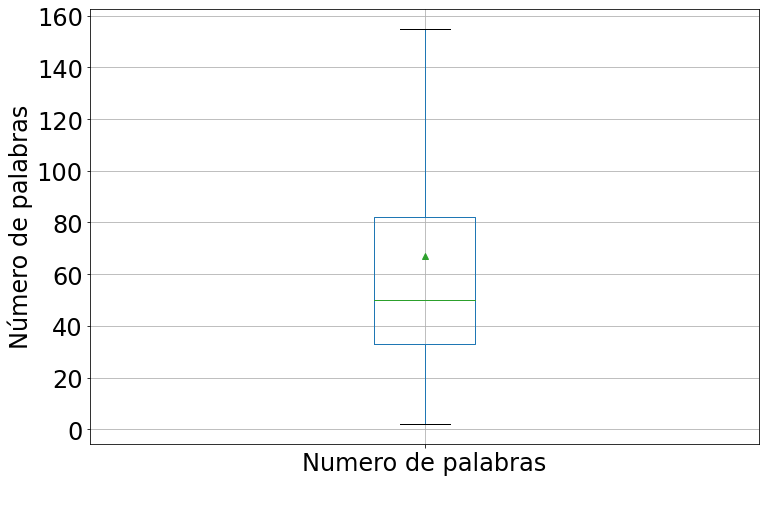

In [ ]:
# Boxplot number of words per review
ax1 = df_example.boxplot(column="Numero de palabras", figsize=(12,8), showmeans=True, showfliers=False,fontsize=24) #delete outliers
ax1.set_ylabel('Número de palabras', fontsize=24)
ax1.set_xlabel(' ', fontsize=24)
plt.show() 

In [ ]:
# Describe the obtained information
df_example['Numero de palabras'].describe()

count    43534.000000
mean        66.904856
std         56.508254
min          2.000000
25%         33.000000
50%         50.000000
75%         82.000000
max       3302.000000
Name: Numero de palabras, dtype: float64

In [ ]:
# Group the reviews by date
df_group_date=df_example.groupby(["date"])["titleopinion"].count().reset_index(name="count")
df_group_date 
# Save the information to csv
df_group_date.to_csv('Turismo_fechas.csv')

date  count
0     2011-05-29      2
1     2011-06-04      1
2     2011-06-08      1
3     2011-06-10      1
4     2011-06-11      1
...          ...    ...
1937  2016-10-27     54
1938  2016-10-28     50
1939  2016-10-29     38
1940  2016-10-30     45
1941  2016-10-31     46

[1942 rows x 2 columns]

In [ ]:
# Eliminate empty data
df_example.replace('', np.nan, inplace=True)
df_example.dropna(inplace=True)

In [ ]:
# Define the stopwords
stop_words=stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Add more stop words that apply to this dataset
stop_words.extend(['not','amp','bit','like', 'Barcelona', 'Sagrada','Familia', 'bu', 'lot', 'sagrada', 'familia', 'la'])

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Lemmatization, elimination of stop words and normalization process
def lemma_words(text):
    lemmas = []
    doc= nlp(text)
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    lemmas= [i for i in lemmas if len(i) > 1]
    lemmas=[word for word in lemmas if word not in stop_words]
    lemmas=' '.join(lemmas)
    lemmas= lemmas.lower() 
    return lemmas

df_example['lemmas'] = df_example['titleopinion'].apply(lemma_words)


In [ ]:
#Delete empty rows
df_example.dropna(inplace=True)
df_example.head()

Unnamed: 0  Unnamed: 0.1           id       username  \
0           0          1123  rn433412187     Neema46664   
1           1          1124  rn433409288         dakane   
2           3          1126  rn433394480         kaci99   
3           4          1127  rn433387404         suzmca   
4           5          1128  rn433386341  PortneufSusan   

                    location       userop                        quote  \
0  San Francisco, California  180 reviews             Amazing amazing    
1       Pacifica, California   10 reviews  Impressive but very crowded   
2                San Jose CA   21 reviews               Awe inspiring.   
3         Nipomo, California  292 reviews                    Beautiful   
4                   Portneuf    7 reviews            A memorable visit   

   rating        date                                      reviewnospace  \
0       5  2016-10-31  Go see it - you won't regret and best advice, ...   
1       3  2016-10-31  I found the Sagrada Familia to be impressive b...   
2       4  2016-10-31  Amazing. Of course this is a must when in Barc...   
3       5  2016-10-31  We purchased tickets on the internet to see th...   
4       5  2016-10-31  The exterior is quite something, but you have ...   

   page                                       titleopinion  \
0   113  Amazing amazing . Go see it - you won't regret...   
1   113  Impressive but very crowded. I found the Sagra...   
2   113  Awe inspiring.. Amazing. Of course this is a m...   
3   113  Beautiful. We purchased tickets on the interne...   
4   113  A memorable visit. The exterior is quite somet...   

   Numero de palabras                                             lemmas  
0                  29  amazing amazing regret good advice early morni...  
1                  40  impressive crowded find impressive crowded go ...  
2                  36  awe inspiring amazing course time visit crowd ...  
3                  83  beautiful purchase ticket internet interior ba...  
4                  30  memorable visit exterior inside finish chef d'...

In [ ]:
# Save the lemmas in csv for later use
df_example['lemmas'].to_csv('Lemmas_Turismo.csv')

In [ ]:
# Save the dataset to csv
df_example.to_csv('Turismo_complete.csv')

# Wordcloud

In [ ]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(10, 7))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(' '.join(df_example['lemmas']))

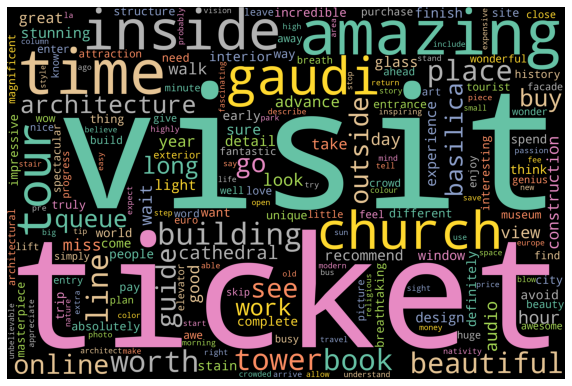

In [ ]:
#Plot wordcloud
plot_cloud(wordcloud) 


# Unigramas, Bigramas, Trigramas

In [ ]:
# Load processed data
df_example = pd.read_csv('Turismo_complete.csv')
dft= df_example['lemmas']
dft = [x for x in dft if str(x) != 'nan']
print(dft)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
### Function to calculate the TF-IDF of Unigrams
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(dft)
names=tfIdfVectorizer.get_feature_names()
freqs = tfIdf.sum(axis=0).A1
result = dict(zip(names, freqs))
print(result)

{'00': 56.28882935825098, '000': 9.785485407591478, '000s': 0.02657984050456433, '00am': 9.15434379060628, '00hrs': 0.5011323380864545, '00noon': 0.2608295951351675, '00pm': 6.327741901826824, '00there': 0.13537891141816313, '02': 0.23118862764165649, '02am': 0.2621404012982551, '03': 0.8134384151228059, '04': 0.8194751396784823, '05': 2.15777837901588, '06': 0.9382531746531642, '0630': 0.3679577246944155, '08': 2.0494851681275077, '0800': 0.2205371971742682, '08013': 0.26799619352159687, '0820': 0.28275586928538915, '0830': 0.8530608645842721, '0845': 0.4968586556806409, '0850': 0.4778377507802429, '0855': 0.2884504876324057, '08h45': 0.36861143391757795, '09': 6.1323738932541945, '0900': 4.06046610376323, '0901': 0.2884504876324057, '0905': 0.2884504876324057, '0915': 0.6538553977638684, '0930': 1.9637020589367824, '0945': 0.20526614289050424, '09h30': 0.12709207984687512, '0l': 0.02657984050456433, '0nline': 0.551172376647981, '0then': 0.17531834456344692, '0this': 0.315175219812969

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Obtain the first 30 most relevant words in the TF-IDF
from operator import itemgetter
i = 0
results_sorted=sorted(result.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 31:
      break
    print(key, value)

visit 1672.7545401758741
amazing 1522.0826317056237
ticket 1492.6510473874964
inside 1249.6998666143575
time 1222.9050533724214
church 1193.7905333369968
worth 1082.104500375885
beautiful 1071.1114522994753
tour 1050.3077453565077
building 1050.050024270996
gaudi 1043.872221922797
line 1031.828485848832
place 1017.2044777516694
book 1013.7488397332537
tower 920.2029820332224
see 900.217247785095
architecture 892.7030542619402
online 855.9295890057186
queue 850.4744209085636
guide 843.197516472058
outside 836.9774352285827
buy 799.2061684398449
long 798.2570698054328
go 779.3350326732259
basilica 748.4019441395325
cathedral 734.3762131186533
work 725.8744797434431
wait 691.1073939674671
miss 689.7293433121916
hour 662.7091337568355


Text(0.5, 1.0, 'Unigramas más relevantes del corpus')

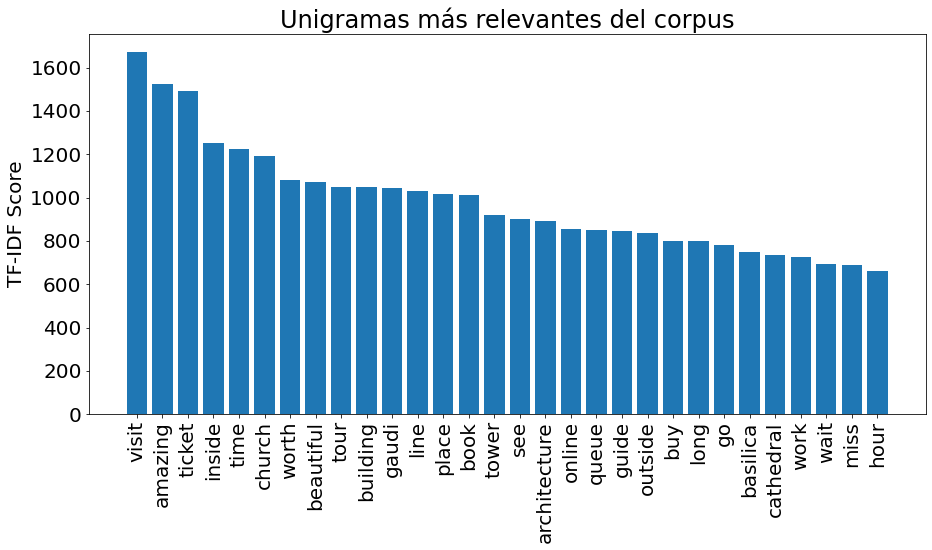

In [ ]:
# Plot the most relevant unigrams
df_results=pd.DataFrame.from_dict(results_sorted).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results[0],df_results[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Unigramas más relevantes del corpus')

In [ ]:
#Obtain the first 30 most relevant bigrams in the TF-IDF
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi= dict(zip(names_bi, freqs_bi))

Text(0.5, 1.0, 'Bigramas más relevantes del corpus')

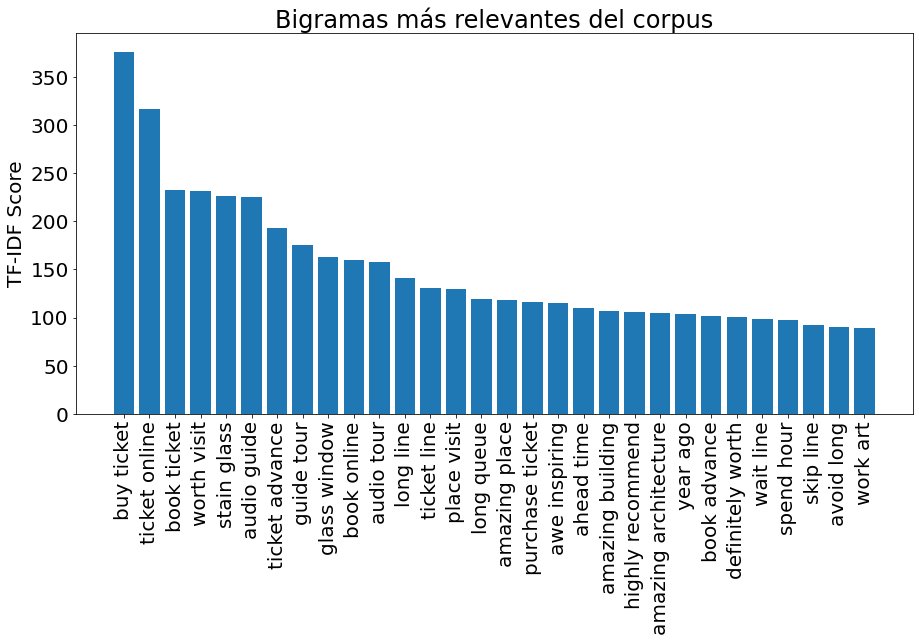

In [ ]:
# Plot the most relevant bigrams
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
df_results_bi=pd.DataFrame.from_dict(results_sorted_bi).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_bi[0],df_results_bi[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Bigramas más relevantes del corpus')

In [ ]:
# Obtain the first 30 most relevant trigrams in the TF-IDF
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft)
names_tri= tfIdfVectorizer_tri.get_feature_names()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri = dict(zip(names_tri, freqs_tri))

Text(0.5, 1.0, 'Trigramas más relevantes del corpus')

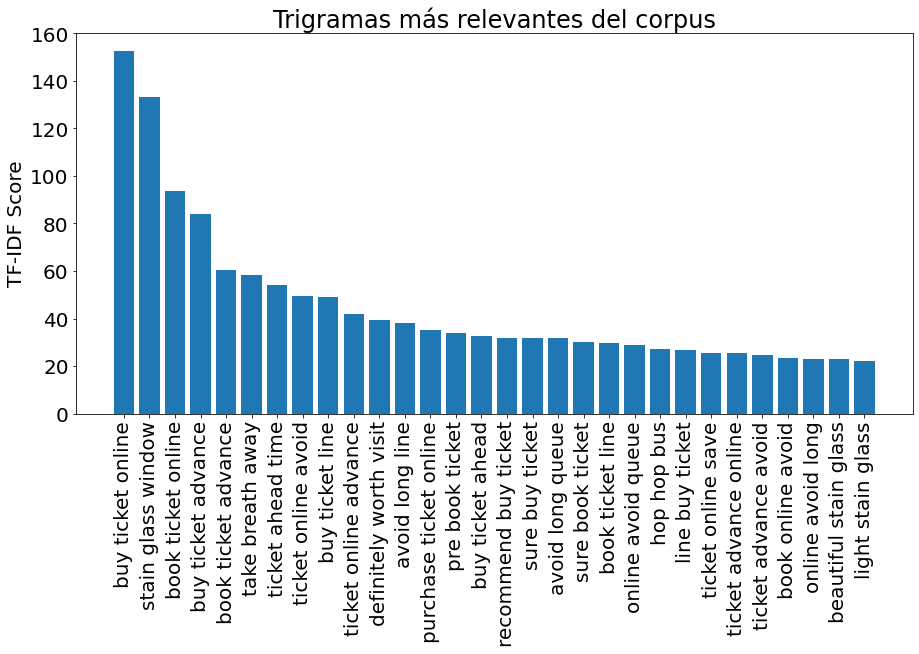

In [ ]:
# Plot the most relevant trigrams
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
df_results_tri=pd.DataFrame.from_dict(results_sorted_tri).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_tri[0],df_results_tri[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Trigramas más relevantes del corpus')

# Modelado de tópicos

In [ ]:
# Load the data
df_model = pd.read_csv('Lemmas_Turismo.csv')
print(df_model.head())

   Unnamed: 0                                             lemmas
0           0  amazing amazing regret good advice early morni...
1           1  impressive crowded find impressive crowded go ...
2           2  awe inspiring amazing course time visit crowd ...
3           3  beautiful purchase ticket internet interior ba...
4           4  memorable visit exterior inside finish chef d'...


In [ ]:
df_example

Unnamed: 0  Unnamed: 0.1           id       username  \
0               0          1123  rn433412187     Neema46664   
1               1          1124  rn433409288         dakane   
2               3          1126  rn433394480         kaci99   
3               4          1127  rn433387404         suzmca   
4               5          1128  rn433386341  PortneufSusan   
...           ...           ...          ...            ...   
37338       43529         44886  rn112573495       BrianUSN   
37339       43530         44887  rn112166337     Bedazzle76   
37340       43531         44888  rn111416892      rspeters7   
37341       43532         44889  rn110378448   stripeyshirt   
37342       43533         44890  rn110339693     richnterry   

                        location       userop  \
0      San Francisco, California  180 reviews   
1           Pacifica, California   10 reviews   
2                    San Jose CA   21 reviews   
3             Nipomo, California  292 reviews   
4                       Portneuf    7 reviews   
...                          ...          ...   
37338         San Antonio, Texas   33 reviews   
37339     Mumbai (Bombay), India   71 reviews   
37340           Cincinnati, Ohio   52 reviews   
37341      Leeds, United Kingdom   17 reviews   
37342      Jacksonville, Florida   64 reviews   

                                             quote  rating        date  \
0                                 Amazing amazing        5  2016-10-31   
1                      Impressive but very crowded       3  2016-10-31   
2                                   Awe inspiring.       4  2016-10-31   
3                                        Beautiful       5  2016-10-31   
4                                A memorable visit       5  2016-10-31   
...                                            ...     ...         ...   
37338   Unique Cathedral - A Must See in Barcelona       5  2011-06-10   
37339                          Absolutely Stunning       5  2011-06-08   
37340                        Awe Inspiring Beauty!       5  2011-06-04   
37341  An astonishing piece of church architecture       5  2011-05-29   
37342          If You Do Nothing Else In Barcelona       5  2011-05-29   

                                           reviewnospace  page  \
0      Go see it - you won't regret and best advice, ...   113   
1      I found the Sagrada Familia to be impressive b...   113   
2      Amazing. Of course this is a must when in Barc...   113   
3      We purchased tickets on the internet to see th...   113   
4      The exterior is quite something, but you have ...   113   
...                                                  ...   ...   
37338  The Cathedral is not near many other big attra...  4488   
37339  If you have to do one thing in Barcelona, it h...  4488   
37340  From our Hotel we took the bus downtown to Bar...  4488   
37341  Go to see the Cathedral before you've seen any...  4488   
37342  First, whatever you do book your tickets on-li...  4488   

                                            titleopinion  Numero de palabras  \
0      Amazing amazing . Go see it - you won't regret...                  29   
1      Impressive but very crowded. I found the Sagra...                  40   
2      Awe inspiring.. Amazing. Of course this is a m...                  36   
3      Beautiful. We purchased tickets on the interne...                  83   
4      A memorable visit. The exterior is quite somet...                  30   
...                                                  ...                 ...   
37338  Unique Cathedral - A Must See in Barcelona. Th...                 164   
37339  Absolutely Stunning. If you have to do one thi...                 163   
37340  Awe Inspiring Beauty!. From our Hotel we took ...                 155   
37341  An astonishing piece of church architecture. G...                 183   
37342  If You Do Nothing Else In Barcelona. First, wh...                 258   

                  

In [ ]:
# Tokenize the data
def tokenize(text):
    text = str(text)
    tokens = text.split() # Make text lowercase and split it
    return tokens

# Apply tokenizer
df_model['tokens'] = df_model['lemmas'].apply(tokenize)
print(df_model.head())

   Unnamed: 0                                             lemmas  \
0           0  amazing amazing regret good advice early morni...   
1           1  impressive crowded find impressive crowded go ...   
2           2  awe inspiring amazing course time visit crowd ...   
3           3  beautiful purchase ticket internet interior ba...   
4           4  memorable visit exterior inside finish chef d'...   

                                              tokens  
0  [amazing, amazing, regret, good, advice, early...  
1  [impressive, crowded, find, impressive, crowde...  
2  [awe, inspiring, amazing, course, time, visit,...  
3  [beautiful, purchase, ticket, internet, interi...  
4  [memorable, visit, exterior, inside, finish, c...  


In [ ]:
# Importing seed for reproducibility
seed(24)
# Create a dictionary of words for topic modeling
id2word = Dictionary(df_model['tokens'])

In [ ]:
# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.95)

In [ ]:
# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in df_model['tokens']]

In [ ]:
# Finding optimal k (Numer of topics)
# PLEASE TAKE INTO COSNDIERATION THAT THIS MDOEL TAKES A LONG TIME 
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the 
    LDA model with respective number of topics
    """
    coherence_values_topic = []
    model_list_topic = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, passes=5)
        model_list_topic.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values_topic.append(coherencemodel.get_coherence())

    return model_list_topic, coherence_values_topic

In [ ]:
# This is to apply the above function which may take a long time
model_list_topic, coherence_values_topic = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=df_model['tokens'],
                                                        start=2, limit=16, step=1) #Compute from 2 to 15 yopics to find the optimum

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += 

In [ ]:
# Obtain the values of the coherence score
coherence_values_topic_df = pd.DataFrame(coherence_values_topic) 

# Save the data as csv
coherence_values_topic_df.to_csv('coherence_values.csv', index=False)

#coherence_values_topic_df= pd.read_csv('coherence_values.csv', index_col=False) #In case we want to load pre-calculated data
coherence_values_topic_df

0
0   0.501732
1   0.518802
2   0.548222
3   0.545399
4   0.528991
5   0.528856
6   0.533665
7   0.507133
8   0.549903
9   0.529583
10  0.528337
11  0.541520
12  0.545029
13  0.520160

In [ ]:
coherence_values_topic_df=coherence_values_topic_df.iloc[:, 0].tolist()

Text(0, 0.5, 'Indice de coherencia')

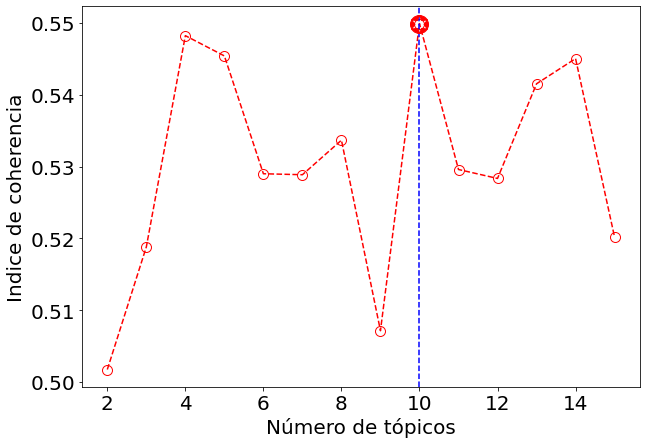

In [ ]:
# PLot to compare the values of the coherence score for each topic
import matplotlib.path as mpath
plt.figure(figsize=(10,7))
estrella = mpath.Path.unit_regular_star(6)
circulo = mpath.Path.unit_circle()
verts = np.concatenate([circulo.vertices, estrella.vertices[::-1, ...]])
codes = np.concatenate([circulo.codes, estrella.codes])
cut_star = mpath.Path(verts, codes)
plt.plot([2,3,4,5,6,7,8,9,10,11,12,13,14,15],coherence_values_topic_df, '--r', marker="o", markersize=10, fillstyle='none')
plt.axvline(x=10, color='b', linestyle='--')
plt.plot(10, 0.5499 , '--r', marker=cut_star, markersize=18)
plt.xlabel('Número de tópicos')
plt.ylabel('Indice de coherencia')


In [ ]:
# Compute model for k=4
k=4
# model LDA 
model_k4 = gensim.models.LdaMulticore(corpus=corpus, 
                                        id2word=id2word, 
                                        num_topics=k,
                                        passes=5,
                                        random_state= 12)


Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += 

In [ ]:
#Save the computed model or load a previously computed one

#model_k4.save("model4_topics.model")
model_k4_load=LdaMulticore.load("model4_topics.model")

/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


In [ ]:
# Calculate the coherence score
coherence_model_k4 = CoherenceModel(model=model_k4_load, texts=df_model['tokens'], 
                                   dictionary=id2word, coherence='c_v')
coherence_model_k4 = coherence_model_k4.get_coherence()
print('\nCoherence Score: ', coherence_model_k4)


Coherence Score:  0.3287135284113357


In [ ]:
# Print the Keyword in each topic
print(model_k4_load.print_topics())
doc_lda = model_k4_load[corpus]
# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in model_k4_load.print_topics()]
# Create Topics
topics = [' '.join(t[0:10]) for t in words]
# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

[(0, '0.047*"ticket" + 0.032*"line" + 0.026*"queue" + 0.023*"time" + 0.022*"long" + 0.021*"visit" + 0.020*"online" + 0.020*"buy" + 0.017*"wait" + 0.017*"book"'), (1, '0.036*"amazing" + 0.028*"inside" + 0.023*"visit" + 0.021*"place" + 0.021*"beautiful" + 0.021*"see" + 0.017*"architecture" + 0.016*"church" + 0.015*"outside" + 0.015*"building"'), (2, '0.046*"tour" + 0.039*"tower" + 0.038*"guide" + 0.029*"audio" + 0.020*"view" + 0.015*"visit" + 0.014*"lift" + 0.013*"worth" + 0.012*"elevator" + 0.012*"recommend"'), (3, '0.033*"gaudi" + 0.025*"church" + 0.018*"work" + 0.016*"visit" + 0.015*"year" + 0.014*"cathedral" + 0.013*"construction" + 0.013*"building" + 0.010*"design" + 0.009*"finish"')]
------ Topic 0 ------
ticket line queue time long visit online buy wait book

------ Topic 1 ------
amazing inside visit place beautiful see architecture church outside building

------ Topic 2 ------
tour tower guide audio view visit lift worth elevator recommend

------ Topic 3 ------
gaudi church wo

In [ ]:
# Plot intertopic distance map
pyLDAvis.enable_notebook()
gensimvis.prepare(model_k4_load, corpus, id2word)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.145432  0.085362       1        1  35.789566
0     -0.137692 -0.120207       2        1  28.962694
2     -0.151162  0.115293       3        1  20.074350
1      0.143423 -0.080448       4        1  15.173390, topic_info=        Term          Freq         Total Category  logprob  loglift
47   version   9280.000000   9280.000000  Default  30.0000  30.0000
8     ticket  14644.000000  14644.000000  Default  29.0000  29.0000
121     huge   7623.000000   7623.000000  Default  28.0000  28.0000
19     tower   9385.000000   9385.000000  Default  27.0000  27.0000
28     audio   5959.000000   5959.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
179   church   1706.463579   9760.241433   Topic4  -4.5001   0.1417
114    extra   1287.519303   3381.068870   Topic4  -4.7818   0.9202
70       get   1640.387212  14935.617465   Topic4  -4.5396  -0.3232
74   magical   1245.688874   6059.818575   Topic4  -4.8149   0.3036
25      time   1277.837467  12650.746860   Topic4  -4.7894  -0.4069

[322 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
3526      4  0.958462    -an
3831      1  0.075639  .very
3831      4  0.920276  .very
240       1  0.019187    100
240       2  0.895729    100
...     ...       ...    ...
322       4  0.704198  write
256       1  0.562488   year
256       2  0.001531   year
256       3  0.000765   year
256       4  0.435450   year

[636 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2])

In [ ]:
model_k4_load.print_topics()

[(0,
  '0.047*"ticket" + 0.032*"line" + 0.026*"queue" + 0.023*"time" + 0.022*"long" + 0.021*"visit" + 0.020*"online" + 0.020*"buy" + 0.017*"wait" + 0.017*"book"'),
 (1,
  '0.036*"amazing" + 0.028*"inside" + 0.023*"visit" + 0.021*"place" + 0.021*"beautiful" + 0.021*"see" + 0.017*"architecture" + 0.016*"church" + 0.015*"outside" + 0.015*"building"'),
 (2,
  '0.046*"tour" + 0.039*"tower" + 0.038*"guide" + 0.029*"audio" + 0.020*"view" + 0.015*"visit" + 0.014*"lift" + 0.013*"worth" + 0.012*"elevator" + 0.012*"recommend"'),
 (3,
  '0.033*"gaudi" + 0.025*"church" + 0.018*"work" + 0.016*"visit" + 0.015*"year" + 0.014*"cathedral" + 0.013*"construction" + 0.013*"building" + 0.010*"design" + 0.009*"finish"')]

In [ ]:
# Compute model for k=10
k=10
# Modelo LDA 
model_k10 = gensim.models.LdaMulticore(corpus=corpus, 
                                        id2word=id2word, 
                                        num_topics=k,
                                        passes=5,
                                        random_state= 12)


Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += 

In [ ]:
# Calculate coherence score
coherence_model_k10 = CoherenceModel(model=model_k10, texts=df_model['tokens'], 
                                   dictionary=id2word, coherence='c_v')
coherence_model_k10 = coherence_model_k10.get_coherence()
print('\nCoherence Score: ', coherence_model_k10)


Coherence Score:  0.5591831191771993


In [ ]:
# Print the Keyword in each topic
print(model_k10.print_topics())
doc_lda = model_k10[corpus]
# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in model_k10.print_topics()]
# Create Topics
topics = [' '.join(t[0:10]) for t in words]
# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

[(0, '0.094*"ticket" + 0.047*"line" + 0.045*"online" + 0.040*"buy" + 0.040*"book" + 0.031*"time" + 0.029*"queue" + 0.028*"visit" + 0.026*"long" + 0.022*"advance"'), (1, '0.044*"line" + 0.032*"early" + 0.026*"wait" + 0.025*"long" + 0.023*"queue" + 0.022*"ticket" + 0.021*"day" + 0.021*"time" + 0.020*"go" + 0.017*"morning"'), (2, '0.057*"inside" + 0.040*"worth" + 0.038*"outside" + 0.028*"amazing" + 0.025*"visit" + 0.024*"building" + 0.019*"look" + 0.019*"go" + 0.018*"beautiful" + 0.017*"queue"'), (3, '0.032*"building" + 0.023*"gaudi" + 0.022*"detail" + 0.021*"museum" + 0.019*"spend" + 0.018*"hour" + 0.016*"architecture" + 0.013*"interesting" + 0.013*"amazing" + 0.012*"visit"'), (4, '0.021*"church" + 0.013*"time" + 0.010*"park" + 0.010*"metro" + 0.009*"area" + 0.009*"shop" + 0.009*"walk" + 0.008*"tourist" + 0.008*"entrance" + 0.008*"people"'), (5, '0.099*"tower" + 0.060*"view" + 0.039*"lift" + 0.034*"elevator" + 0.024*"walk" + 0.018*"stair" + 0.018*"nativity" + 0.015*"passion" + 0.013*"cit

In [ ]:
# Plot intertopic distance map for k=10 
pyLDAvis.enable_notebook()
gensimvis.prepare(model_k10, corpus, id2word)

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.150334 -0.164922       1        1  16.692756
2     -0.016685 -0.058873       2        1  12.630217
9      0.164521 -0.062303       3        1  12.118439
8      0.183713  0.032565       4        1  11.665142
7      0.242087 -0.002423       5        1  10.953923
6     -0.085731  0.092713       6        1   7.740804
1     -0.191321 -0.150341       7        1   7.689057
4     -0.121812  0.066372       8        1   7.600791
3      0.097312 -0.016224       9        1   6.667118
5     -0.121750  0.263436      10        1   6.241753, topic_info=          Term          Freq         Total Category  logprob  loglift
8       ticket  17908.000000  17908.000000  Default  30.0000  30.0000
46        tour   9743.000000   9743.000000  Default  29.0000  29.0000
120      guide   8019.000000   8019.000000  Default  28.0000  28.0000
19       tower   8866.000000   8866.000000  Default  27.0000  27.0000
28       audio   6254.000000   6254.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
248     little    297.586535   1689.811364  Topic10  -5.3583   1.0372
215  recommend    323.854338   3921.786383  Topic10  -5.2737   0.2799
136        pay    307.852231   2668.066013  Topic10  -5.3244   0.6144
179     church    343.514320  16133.943549  Topic10  -5.2148  -1.0755
26       visit    337.422971  18931.404697  Topic10  -5.2327  -1.2533

[751 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
8356      1  0.971288  09:00
206       1  0.033309     10
206       2  0.106373     10
206       3  0.301927     10
206       4  0.002149     10
...     ...       ...    ...
256       5  0.216677   year
256       6  0.001541   year
256       7  0.016955   year
256       8  0.005945   year
256      10  0.000881   year

[2196 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 10, 9, 8, 7, 2, 5, 4, 6])

In [ ]:
model_k10.print_topics()

[(0,
  '0.094*"ticket" + 0.047*"line" + 0.045*"online" + 0.040*"buy" + 0.040*"book" + 0.031*"time" + 0.029*"queue" + 0.028*"visit" + 0.026*"long" + 0.022*"advance"'),
 (1,
  '0.044*"line" + 0.032*"early" + 0.026*"wait" + 0.025*"long" + 0.023*"queue" + 0.022*"ticket" + 0.021*"day" + 0.021*"time" + 0.020*"go" + 0.017*"morning"'),
 (2,
  '0.057*"inside" + 0.040*"worth" + 0.038*"outside" + 0.028*"amazing" + 0.025*"visit" + 0.024*"building" + 0.019*"look" + 0.019*"go" + 0.018*"beautiful" + 0.017*"queue"'),
 (3,
  '0.032*"building" + 0.023*"gaudi" + 0.022*"detail" + 0.021*"museum" + 0.019*"spend" + 0.018*"hour" + 0.016*"architecture" + 0.013*"interesting" + 0.013*"amazing" + 0.012*"visit"'),
 (4,
  '0.021*"church" + 0.013*"time" + 0.010*"park" + 0.010*"metro" + 0.009*"area" + 0.009*"shop" + 0.009*"walk" + 0.008*"tourist" + 0.008*"entrance" + 0.008*"people"'),
 (5,
  '0.099*"tower" + 0.060*"view" + 0.039*"lift" + 0.034*"elevator" + 0.024*"walk" + 0.018*"stair" + 0.018*"nativity" + 0.015*"pass

In [ ]:
# Obtain the relevance of each topic in the corpus for k=10
def document_to_lda_features(model_k10,document):
  topic_importance=np.array(model_k10.get_document_topics(document, minimum_probability=0))
  return topic_importance[:,1]

df_model['lda_features']=list(map(lambda doc: document_to_lda_features(model_k10,doc), corpus))

In [ ]:
def topic_important(item_score):
    score=np.argmax(item_score, axis=0)
    return score

# See which topic is predominant in each review
df_model['topic_dominant'] = df_model['lda_features'].apply(topic_important)
df_model


Unnamed: 0                                             lemmas  \
0               0  amazing amazing regret good advice early morni...   
1               1  impressive crowded find impressive crowded go ...   
2               2  awe inspiring amazing course time visit crowd ...   
3               3  beautiful purchase ticket internet interior ba...   
4               4  memorable visit exterior inside finish chef d'...   
...           ...                                                ...   
37338       37338  unique cathedral cathedral near big attraction...   
37339       37339  absolutely stunning thing la long time think f...   
37340       37340  awe inspiring beauty hotel take bus downtown t...   
37341       37341  astonishing piece church architecture cathedra...   
37342       37342  book ticket line print home simple save time f...   

                                                  tokens  \
0      [amazing, amazing, regret, good, advice, early...   
1      [impressive, crowded, find, impressive, crowde...   
2      [awe, inspiring, amazing, course, time, visit,...   
3      [beautiful, purchase, ticket, internet, interi...   
4      [memorable, visit, exterior, inside, finish, c...   
...                                                  ...   
37338  [unique, cathedral, cathedral, near, big, attr...   
37339  [absolutely, stunning, thing, la, long, time, ...   
37340  [awe, inspiring, beauty, hotel, take, bus, dow...   
37341  [astonishing, piece, church, architecture, cat...   
37342  [book, ticket, line, print, home, simple, save...   

                                            lda_features  topic_dominant  
0      [0.6142314672470093, 0.22147785127162933, 0.00...               0  
1      [0.007693220395594835, 0.6808406114578247, 0.0...               1  
2      [0.0076943314634263515, 0.19275608658790588, 0...               2  
3      [0.5913103222846985, 0.00322644948028028, 0.00...               0  
4      [0.009092383086681366, 0.009093884378671646, 0...               9  
...                                                  ...             ...  
37338  [0.00166718615218997, 0.22432202100753784, 0.0...               4  
37339  [0.001587610924616456, 0.0015876643592491746, ...               7  
37340  [0.0016396520659327507, 0.20266276597976685, 0...               7  
37341  [0.03637228161096573, 0.1971455216407776, 0.11...               9  
37342  [0.21038490533828735, 0.10786789655685425, 0.0...               0  

[37343 rows x 5 columns]

In [ ]:
df_model= pd.read_csv('topic_model_results.csv')

In [ ]:
# Count the number of reviews associated with each topic
df_model["topic_dominant"].value_counts()

0    8992
9    6971
2    6084
7    4088
8    3782
6    2073
1    1899
3    1568
4     956
5     930
Name: topic_dominant, dtype: int64

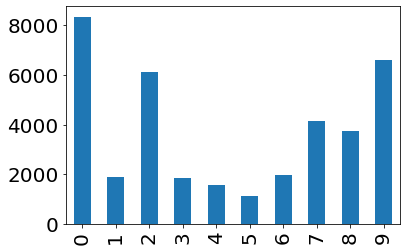

In [ ]:
# Plot topic distribution in the corpus
ax=df_model["topic_dominant"].value_counts().sort_index().plot(kind='bar')
plt.ylabel('Frecuencia Absoluta')
plt.title('Distribución de tópicos en el corpus textual')
plt.show()

In [ ]:
# Procedure to obtain the correct order for the topics (starting in 1 instead of 0)
ax = pd.DataFrame(ax)
ax.insert(1, 'Topico', [1,2,3,4,5,6,7,8,9,10], True)
ax


topic_dominant  Topico
0            8333       1
1            1889       2
2            6103       3
3            1852       4
4            1579       5
5            1131       6
6            1958       7
7            4160       8
8            3732       9
9            6606      10

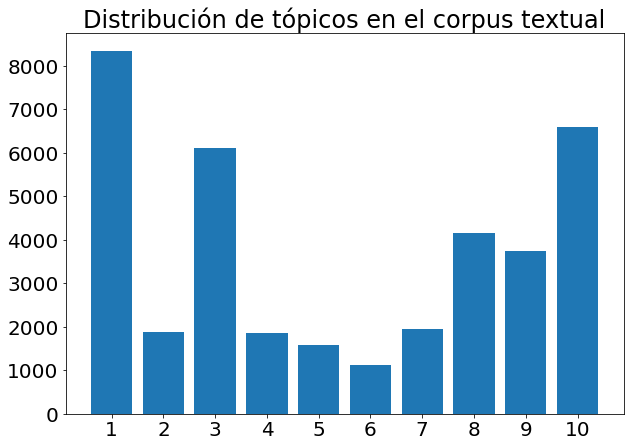

In [ ]:
# Plot topic importance
x_axis = ax['Topico']
y_axis = ax['topic_dominant']
plt.figure(figsize=(10,7))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis, x_axis)
plt.title('Distribución de tópicos en el corpus textual')
plt.show()

# Bigramas por tópico

In [ ]:
## Obtain the bigrams for each topic
topic_1 = df_model[df_model['topic_dominant']==0] 
dft=topic_1['lemmas']
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi_1= dict(zip(names_bi, freqs_bi))

from operator import itemgetter
i = 0
results_sorted=sorted(result_bi_1.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

buy ticket 196.75816289288457
ticket online 168.73355937450106
book ticket 130.53968417600143
ticket advance 110.4533635787915
book online 86.88316091439576
ticket line 76.8064771512094
audio guide 71.12055869973469
long line 69.54994130196013
worth visit 69.22861213898088
purchase ticket 66.54934180408613


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Bigramas más relevantes en el tópico 1')

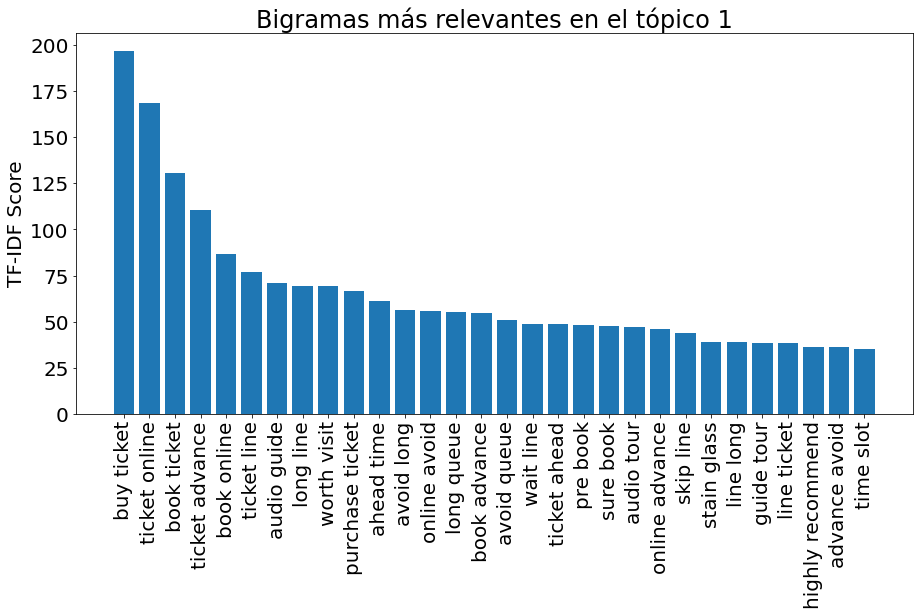

In [ ]:
results_sorted_bi_1=sorted(result_bi_1.items(), key = itemgetter(1), reverse = True)
df_results_bi_1=pd.DataFrame.from_dict(results_sorted_bi_1).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_bi_1[0],df_results_bi_1[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Bigramas más relevantes en el tópico 1')

In [ ]:
## Obtain bigrams for topic 2
topic_2 = df_model[df_model['topic_dominant']==1] 
dft=topic_2['lemmas']
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi_2= dict(zip(names_bi, freqs_bi))

from operator import itemgetter
i = 0
results_sorted=sorted(result_bi_2.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

buy ticket 20.45951518085233
early morning 17.36211311789118
long line 15.991520982772487
ticket online 13.33121988949236
long queue 12.741356473077257
wait line 11.982865954349718
worth wait 11.117945590551798
audio guide 10.418871387113132
ticket line 9.89512331544926
line long 9.810916615779853


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Bigramas más relevantes del tópico 2')

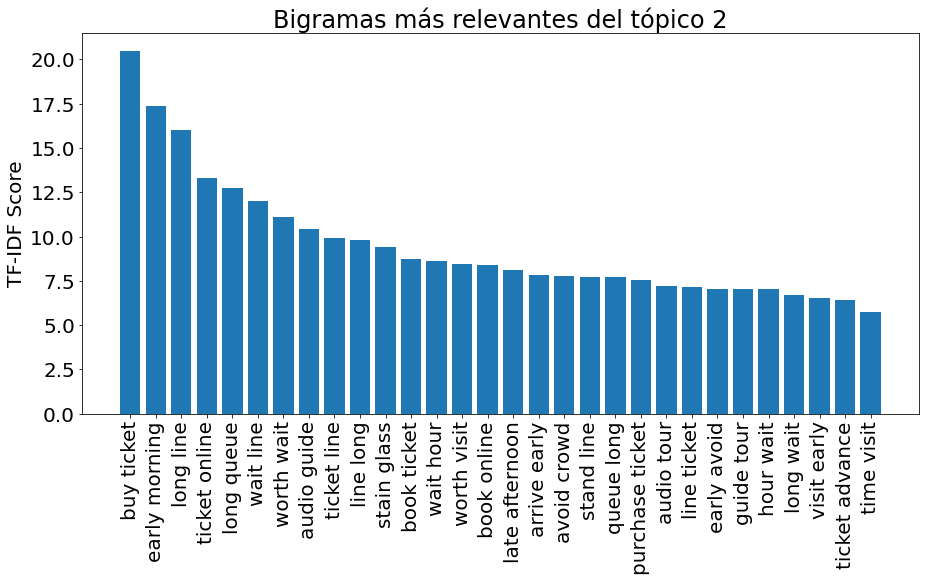

In [ ]:
results_sorted_bi_2=sorted(result_bi_2.items(), key = itemgetter(1), reverse = True)
df_results_bi_2=pd.DataFrame.from_dict(results_sorted_bi_2).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_bi_2[0],df_results_bi_2[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Bigramas más relevantes del tópico 2')

In [ ]:
## Obtain bigrams for topic 3
topic_3 = df_model[df_model['topic_dominant']==2] 
dft=topic_3['lemmas']
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi= dict(zip(names_bi, freqs_bi))

from operator import itemgetter
i = 0
results_sorted=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

worth visit 62.23399212722897
breath away 37.22490499267953
definitely worth 32.9587714543236
amazing building 32.262402947879885
take breath 31.3524400939755
outside inside 29.203505985763293
inside outside 28.566474189536535
buy ticket 28.000895307369877
audio guide 27.670935645593175
stain glass 27.100290950583876


Text(0.5, 1.0, 'Bigramas más relevantes del tópico 3')

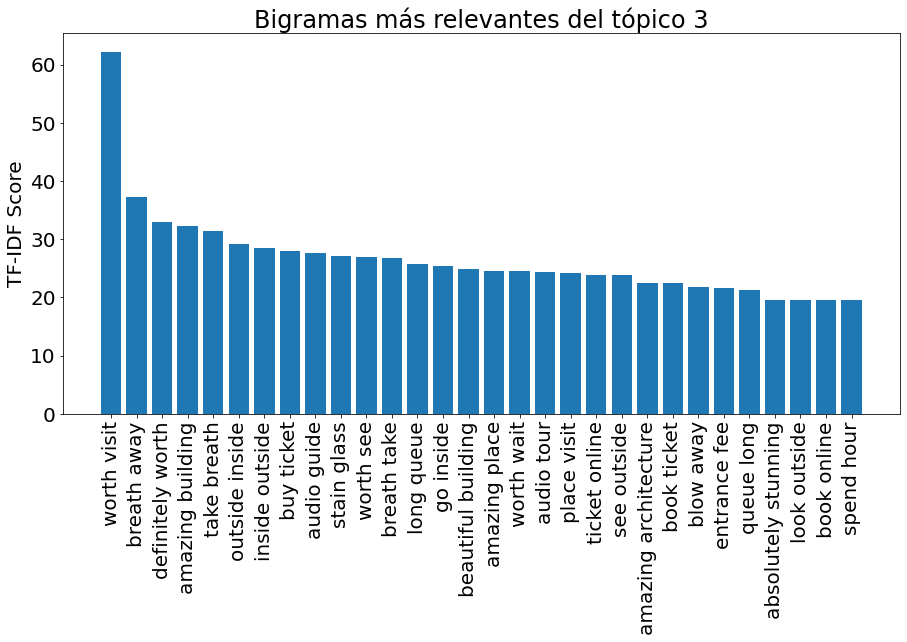

In [ ]:
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
df_results_bi=pd.DataFrame.from_dict(results_sorted_bi).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_bi[0],df_results_bi[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Bigramas más relevantes del tópico 3')

In [ ]:
## Obtain bigrams for topic 4
topic_4 = df_model[df_model['topic_dominant']==3] 
dft=topic_4['lemmas']
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi= dict(zip(names_bi, freqs_bi))

from operator import itemgetter
i = 0
results_sorted=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

spend hour 16.157239638511086
audio guide 10.125617674058619
guide tour 9.916731422973337
worth visit 9.846636454243807
spend time 7.849589776217195
mind blow 7.33670062207215
amazing building 7.216806773114312
audio tour 6.966637876839455
attention detail 6.561844707160332
buy ticket 6.410228757766559


Text(0.5, 1.0, 'Bigramas más relevantes del tópico 4')

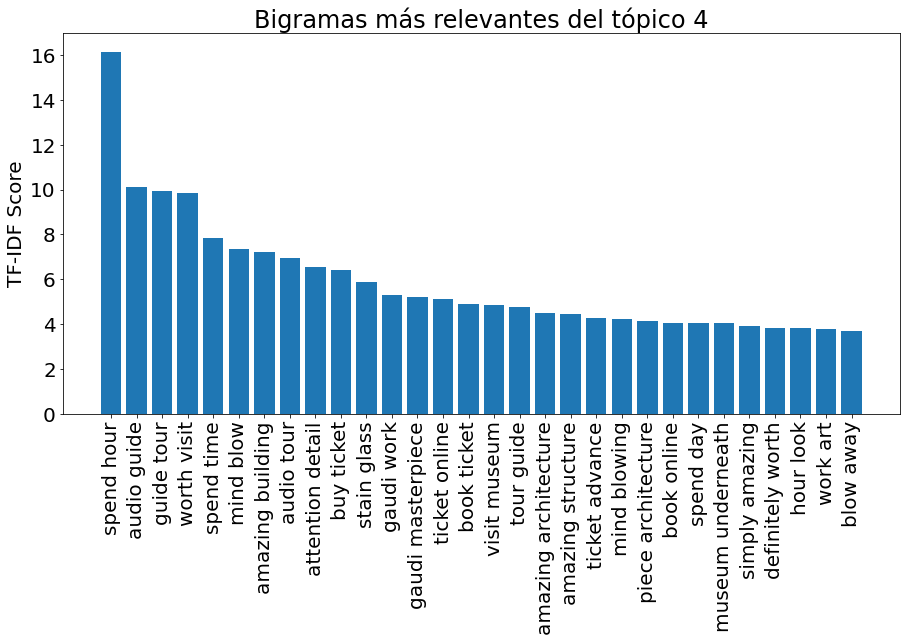

In [ ]:
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
df_results_bi=pd.DataFrame.from_dict(results_sorted_bi).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_bi[0],df_results_bi[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Bigramas más relevantes del tópico 4')

In [ ]:
## Obtain bigrams for topic 5
topic_5 = df_model[df_model['topic_dominant']==4] 
dft=topic_5['lemmas']
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi= dict(zip(names_bi, freqs_bi))

from operator import itemgetter
i = 0
results_sorted=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

buy ticket 6.448370392152791
audio guide 6.278830903811683
metro station 6.1168480949524975
ticket online 5.319966206329583
worth visit 4.407374037112652
tourist attraction 3.595441586420592
easy metro 3.4739316601945927
book ticket 3.316032376613333
guide tour 3.0163320490380645
audio tour 3.0118960486429662


Text(0.5, 1.0, 'Bigramas más relevantes del tópico 5')

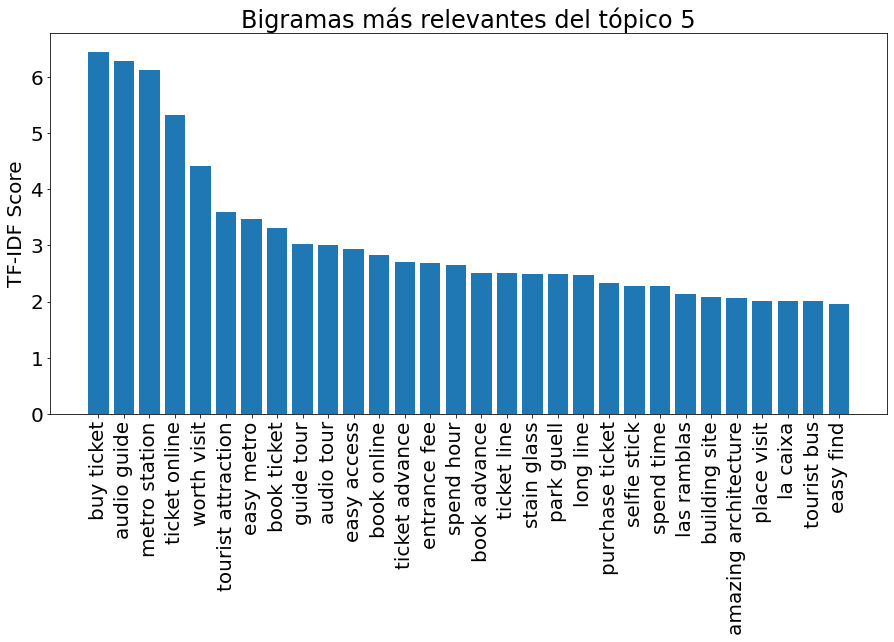

In [ ]:
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
df_results_bi=pd.DataFrame.from_dict(results_sorted_bi).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_bi[0],df_results_bi[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Bigramas más relevantes del tópico 5')

In [ ]:
## Obtain bigrams for topic 6
topic_6 = df_model[df_model['topic_dominant']==5] 
dft=topic_6['lemmas']
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi= dict(zip(names_bi, freqs_bi))

from operator import itemgetter
i = 0
results_sorted=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

nativity tower 13.238391746716191
audio guide 13.132084041543125
passion tower 12.048978120508185
spiral staircase 11.931232199479856
buy ticket 11.406789219468358
view city 11.264067427924772
ticket online 10.503465301278709
great view 9.289802581020986
stain glass 8.588324644540597
audio tour 8.3825747840178


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Bigramas más relevantes del tópico 6')

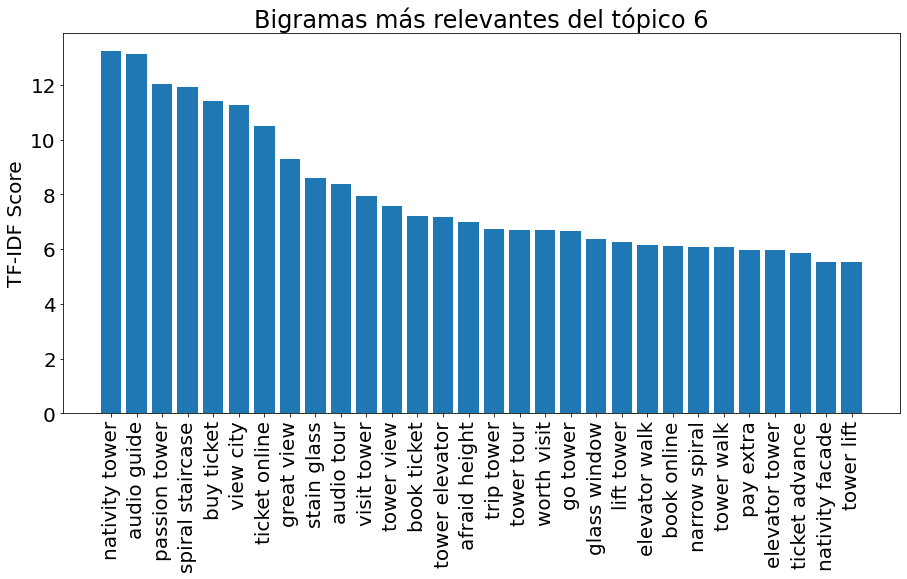

In [ ]:
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
df_results_bi=pd.DataFrame.from_dict(results_sorted_bi).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_bi[0],df_results_bi[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Bigramas más relevantes del tópico 6')

In [ ]:
## Obtain bigrams for topic 7
topic_7 = df_model[df_model['topic_dominant']==6] 
dft=topic_7['lemmas']
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi= dict(zip(names_bi, freqs_bi))

from operator import itemgetter
i = 0
results_sorted=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

guide tour 45.60045717868702
audio guide 40.1716441244688
tour guide 30.900326057945847
audio tour 30.256623986519358
highly recommend 19.762287057373936
skip line 17.362948805279284
buy ticket 12.28764604607912
worth visit 11.148157924684734
ticket online 11.127822045581876
book tour 10.476290247465654


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Bigramas más relevantes del tópico 7')

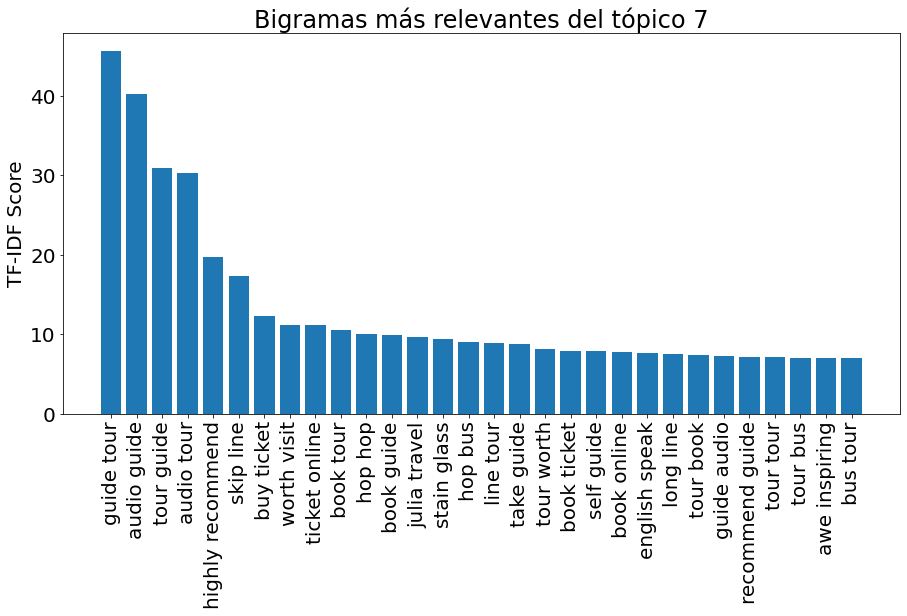

In [ ]:
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
df_results_bi=pd.DataFrame.from_dict(results_sorted_bi).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_bi[0],df_results_bi[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Bigramas más relevantes del tópico 7')

In [ ]:
## Obtain bigrams for topic 8
topic_8 = df_model[df_model['topic_dominant']==7] 
dft=topic_8['lemmas']
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi= dict(zip(names_bi, freqs_bi))

from operator import itemgetter
i = 0
results_sorted=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

awe inspiring 35.25004968253098
word describe 25.97442440181114
gaudi masterpiece 25.03330750819696
antoni gaudi 24.603687343471407
work art 21.333995024638526
gaudi genius 20.733780852589515
gaudi work 20.19309391980423
work progress 18.387744333940173
wonder world 18.387418299653188
buy ticket 17.769977780043934


Text(0.5, 1.0, 'Bigramas más relevantes del tópico 8')

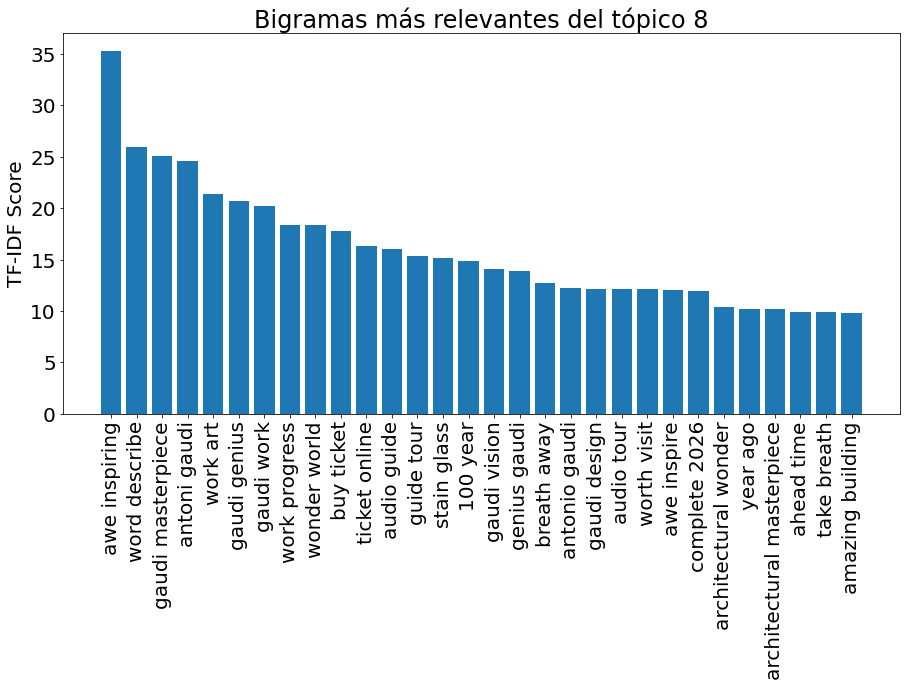

In [ ]:
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
df_results_bi=pd.DataFrame.from_dict(results_sorted_bi).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_bi[0],df_results_bi[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Bigramas más relevantes del tópico 8')

In [ ]:
## Obtain bigrams for topic 9
topic_9 = df_model[df_model['topic_dominant']==8] 
dft=topic_9['lemmas']
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi= dict(zip(names_bi, freqs_bi))

from operator import itemgetter
i = 0
results_sorted=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

stain glass 75.9313005863637
glass window 62.35384147250944
buy ticket 24.49611383618995
awe inspiring 19.311598063005505
ticket online 19.275370270097742
audio guide 18.254726153652882
sunny day 16.169045103659048
light come 14.447149136449127
worth visit 14.401491361574974
light stain 13.972774335419514


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Bigramas más relevantes del tópico 9')

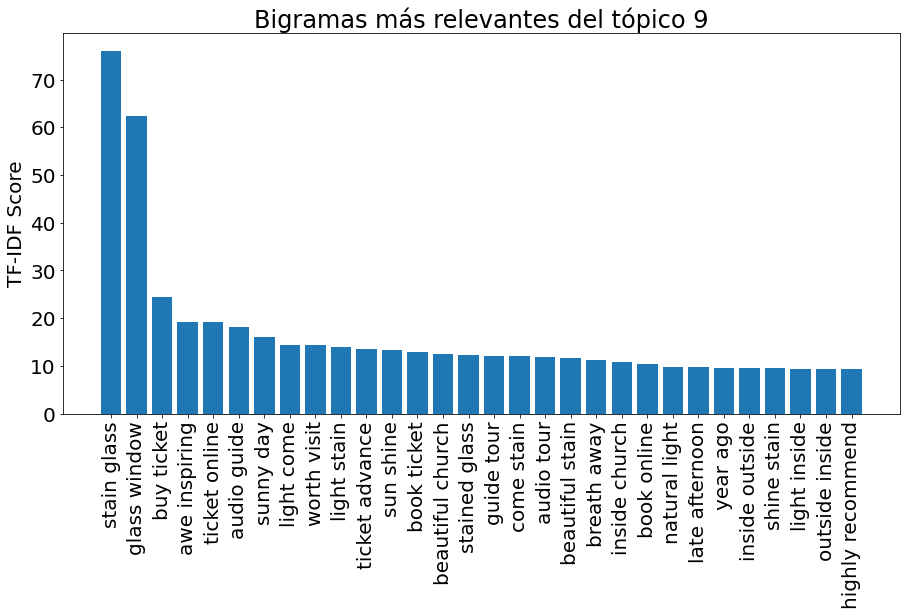

In [ ]:
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
df_results_bi=pd.DataFrame.from_dict(results_sorted_bi).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_bi[0],df_results_bi[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Bigramas más relevantes del tópico 9')

In [ ]:
## Obtain bigrams for topic 10
topic_10 = df_model[df_model['topic_dominant']==9] 
dft=topic_10['lemmas']
tfIdfVectorizer_bi=TfidfVectorizer(use_idf=True, ngram_range=(2,2))
tfIdf_bi = tfIdfVectorizer_bi.fit_transform(dft)
names_bi=tfIdfVectorizer_bi.get_feature_names()
freqs_bi = tfIdf_bi.sum(axis=0).A1
result_bi= dict(zip(names_bi, freqs_bi))

from operator import itemgetter
i = 0
results_sorted=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

worth visit 50.87009123952071
year ago 50.51688772454871
place visit 48.077865314944056
amazing place 39.51991031728485
amazing architecture 33.02286938200465
work progress 29.770486684313468
100 year 29.720801933396128
beautiful church 29.258391403658614
work art 29.15225470976913
piece architecture 28.24454440794727


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Bigramas más relevantes del tópico 10')

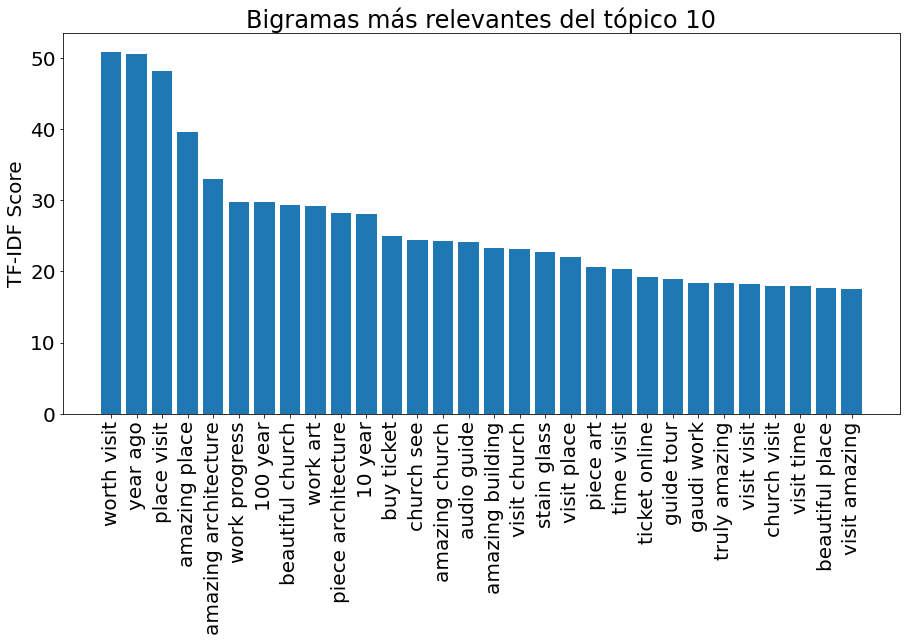

In [ ]:
results_sorted_bi=sorted(result_bi.items(), key = itemgetter(1), reverse = True)
df_results_bi=pd.DataFrame.from_dict(results_sorted_bi).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_bi[0],df_results_bi[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Bigramas más relevantes del tópico 10')

# Trigramas por tópico


In [ ]:
## Obtain trigrams for topic 1
topic_1 = df_model[df_model['topic_dominant']==0] 
dft=topic_1['lemmas']
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft)
names_tri= tfIdfVectorizer_tri.get_feature_names()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri = dict(zip(names_tri, freqs_tri))

from operator import itemgetter
i = 0
results_sorted=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


buy ticket online 93.65553694698667
book ticket online 59.94256200972987
buy ticket advance 53.04766650325309
book ticket advance 39.41344336454583
ticket ahead time 34.58113168039806
ticket online avoid 33.936909842465
buy ticket line 32.85898851469334
ticket online advance 28.993582019929516
avoid long line 25.655673924542352
stain glass window 22.83186413646275


Text(0.5, 1.0, 'Trigramas más relevantes del tópico 1')

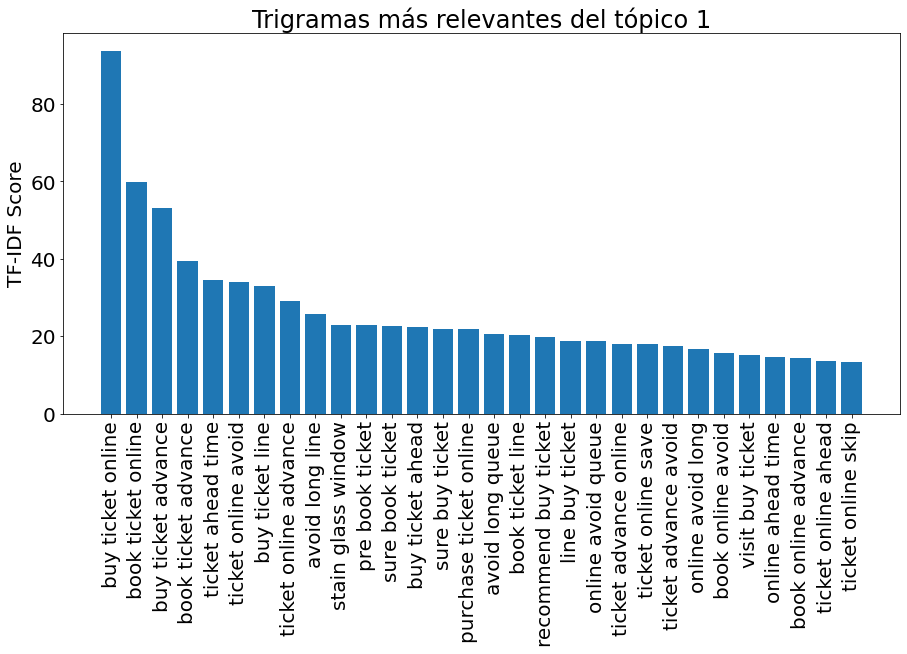

In [ ]:
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
df_results_tri=pd.DataFrame.from_dict(results_sorted_tri).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_tri[0],df_results_tri[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Trigramas más relevantes del tópico 1')

In [ ]:
## Obtain trigrams for topic 2
topic_2 = df_model[df_model['topic_dominant']==1] 
dft=topic_2['lemmas']
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft)
names_tri= tfIdfVectorizer_tri.get_feature_names()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri = dict(zip(names_tri, freqs_tri))

from operator import itemgetter
i = 0
results_sorted=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

buy ticket online 6.432064501102615
stain glass window 4.705239460210626
buy ticket line 3.7509480402771844
hop hop bus 3.600988398511613
buy ticket advance 3.5460664792088505
book ticket online 3.5333560266250155
early avoid crowd 3.392470188851049
visit early morning 3.2924284170805316
purchase ticket online 2.7684348025431538
early morning late 2.7121655590784606


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Trigramas más relevantes del tópico 2')

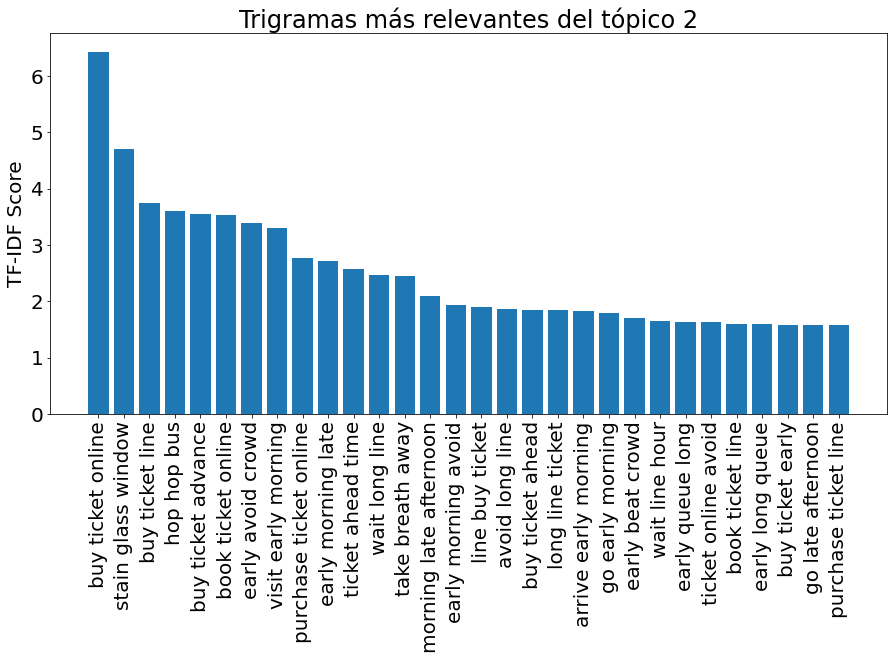

In [ ]:
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
df_results_tri=pd.DataFrame.from_dict(results_sorted_tri).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_tri[0],df_results_tri[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Trigramas más relevantes del tópico 2')

In [ ]:
## Obtain trigrams for topic 3
topic_3 = df_model[df_model['topic_dominant']==2] 
dft=topic_3['lemmas']
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft)
names_tri= tfIdfVectorizer_tri.get_feature_names()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri = dict(zip(names_tri, freqs_tri))

from operator import itemgetter
i = 0
results_sorted=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

take breath away 28.223542901097705
stain glass window 16.20745490809833
definitely worth visit 12.868565338022753
buy ticket online 11.213849709300462
book ticket online 8.03688517692721
worth entrance fee 7.51107932842318
pay extra tower 6.113656948270334
hop hop bus 6.071921944772734
inside take breath 5.573522206599501
outside amazing inside 5.4981305191100915


Text(0.5, 1.0, 'Trigramas más relevantes del tópico 3')

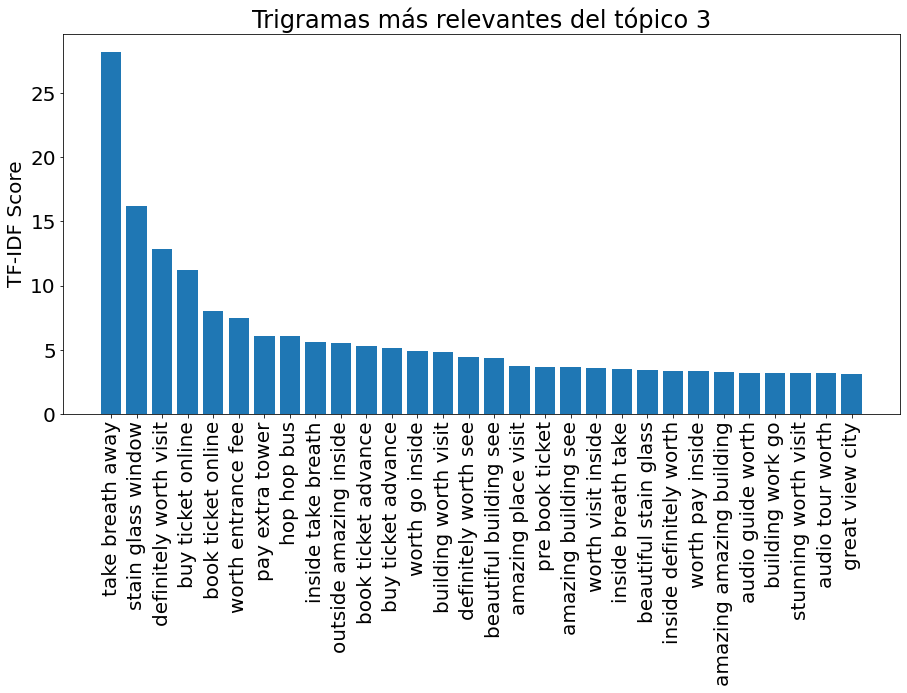

In [ ]:
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
df_results_tri=pd.DataFrame.from_dict(results_sorted_tri).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_tri[0],df_results_tri[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Trigramas más relevantes del tópico 3')

In [ ]:
## Obtain trigrams for topic 4
topic_4 = df_model[df_model['topic_dominant']==3] 
dft=topic_4['lemmas']
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft)
names_tri= tfIdfVectorizer_tri.get_feature_names()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri = dict(zip(names_tri, freqs_tri))

from operator import itemgetter
i = 0
results_sorted=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

buy ticket online 3.9129858821503576
spend hour look 3.3119168345509675
stain glass window 3.216681940679623
plan spend hour 2.7950301821638432
definitely worth visit 2.4100438144825747
buy ticket advance 2.2076120361075886
audio guide tour 2.1163011871640554
book ticket online 2.0679928899688176
spend couple hour 2.0658716874155783
book ticket advance 2.0407738130197335


Text(0.5, 1.0, 'Trigramas más relevantes del tópico 4')

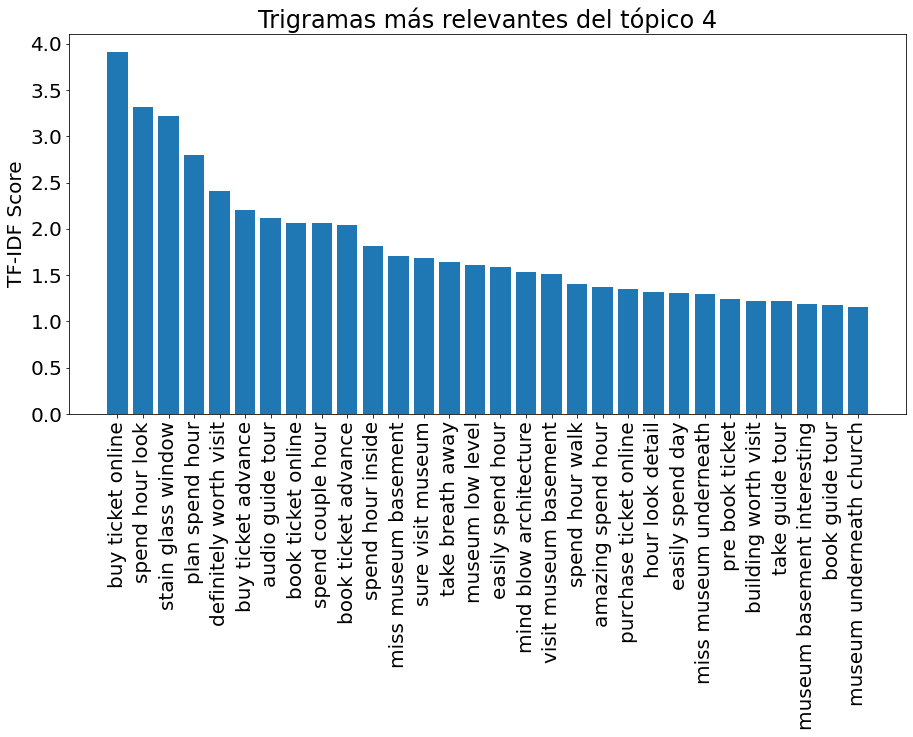

In [ ]:
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
df_results_tri=pd.DataFrame.from_dict(results_sorted_tri).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_tri[0],df_results_tri[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Trigramas más relevantes del tópico 4')

In [ ]:
## Obtain trigrams for topic 5
topic_5 = df_model[df_model['topic_dominant']==4] 
dft=topic_5['lemmas']
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft)
names_tri= tfIdfVectorizer_tri.get_feature_names()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri = dict(zip(names_tri, freqs_tri))

from operator import itemgetter
i = 0
results_sorted=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

buy ticket online 2.661745024239971
book ticket online 1.6638886703699864
stain glass window 1.6302466801464142
buy ticket advance 1.6154368553474607
metro station right 1.298362196496924
near metro station 1.0971678953949493
gaudy las vegas 0.8797128720288476
hop hop bus 0.8784288142585203
easily accessible metro 0.8359123898498086
book entrance ticket 0.8179091892185776


Text(0.5, 1.0, 'Trigramas más relevantes del tópico 5')

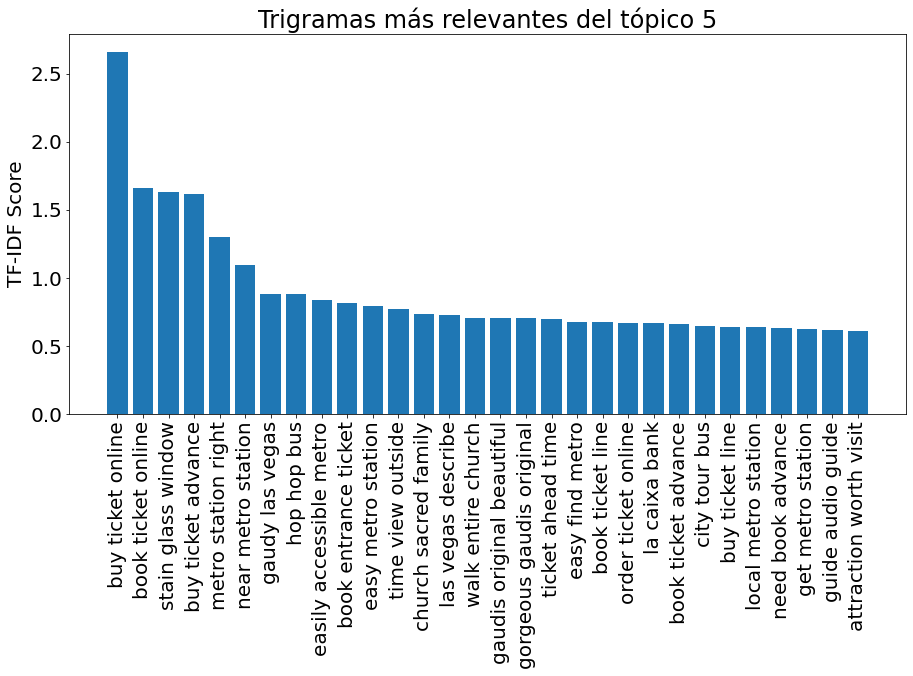

In [ ]:
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
df_results_tri=pd.DataFrame.from_dict(results_sorted_tri).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_tri[0],df_results_tri[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Trigramas más relevantes del tópico 5')

In [ ]:
## Obtain trigrams for topic 6
topic_6 = df_model[df_model['topic_dominant']==5] 
dft=topic_6['lemmas']
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft)
names_tri= tfIdfVectorizer_tri.get_feature_names()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri = dict(zip(names_tri, freqs_tri))

from operator import itemgetter
i = 0
results_sorted=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

stain glass window 5.737484684141686
buy ticket online 5.003864156724599
narrow spiral staircase 3.7242671878238927
go nativity tower 3.6953950464295873
book ticket online 3.4777789753046484
go passion tower 3.026979924866779
walk spiral staircase 2.9421853699782603
great view city 2.8609350298126515
ticket ahead time 2.588388776762216
pay extra tower 2.494271507458732


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Trigramas más relevantes del tópico 6')

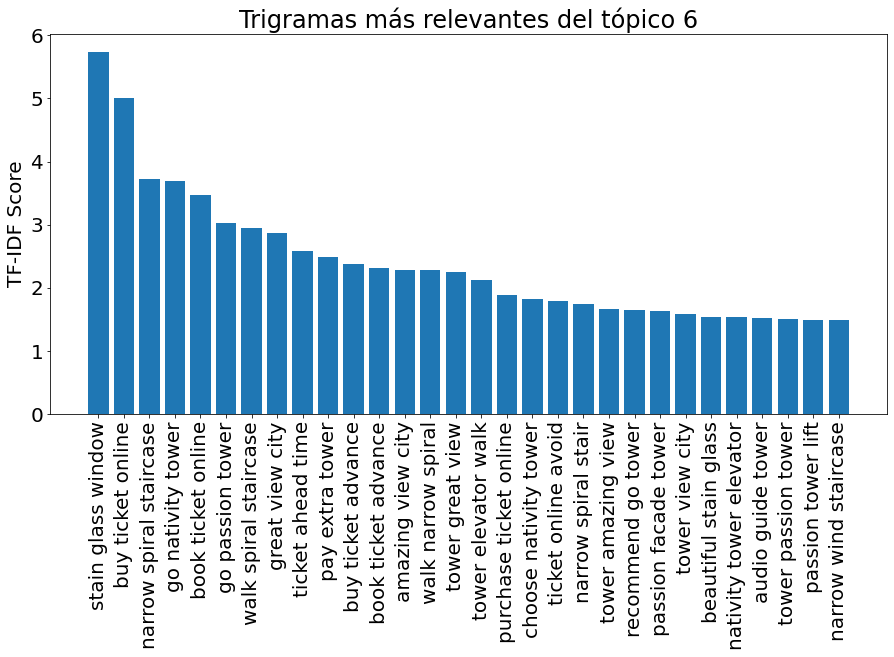

In [ ]:
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
df_results_tri=pd.DataFrame.from_dict(results_sorted_tri).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_tri[0],df_results_tri[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Trigramas más relevantes del tópico 6')

In [ ]:
## Obtain trigrams for topic 7
topic_7 = df_model[df_model['topic_dominant']==6] 
dft=topic_7['lemmas']
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft)
names_tri= tfIdfVectorizer_tri.get_feature_names()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri = dict(zip(names_tri, freqs_tri))

from operator import itemgetter
i = 0
results_sorted=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


book guide tour 8.103653390167157
hop hop bus 7.264123982227419
take guide tour 7.0850904995749175
skip line tour 6.811534253667079
recommend guide tour 4.965979988032056
tour julia travel 4.893177696805957
stain glass window 4.717424624340902
guide tour worth 4.598941141004257
guide audio tour 4.579136843168432
buy ticket online 4.560105584438758


Text(0.5, 1.0, 'Trigramas más relevantes del tópico 7')

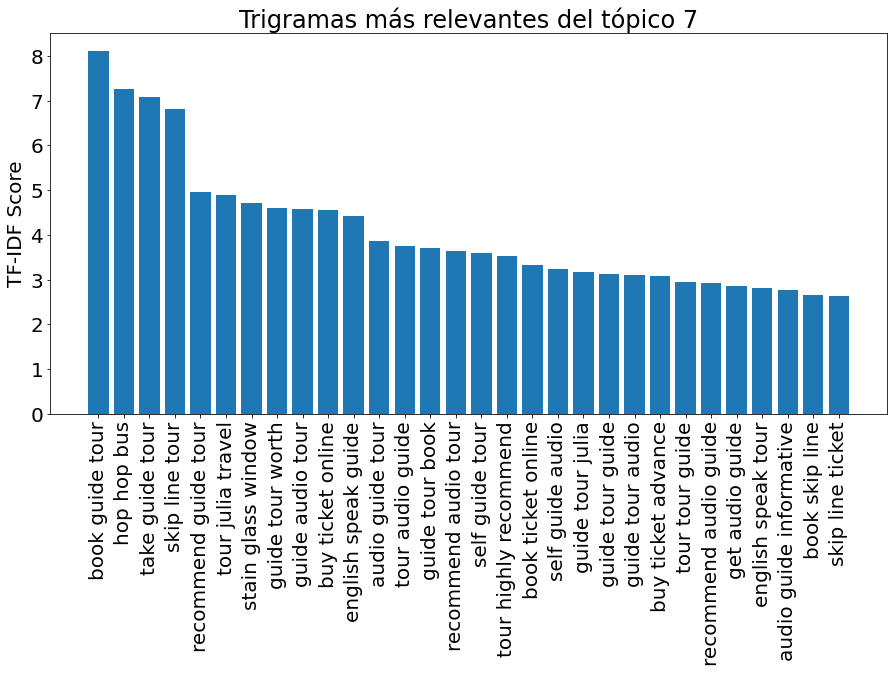

In [ ]:
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
df_results_tri=pd.DataFrame.from_dict(results_sorted_tri).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_tri[0],df_results_tri[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Trigramas más relevantes del tópico 7')

In [ ]:
## Obtain trigrams for topic 8
topic_8 = df_model[df_model['topic_dominant']==7] 
dft=topic_8['lemmas']
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft)
names_tri= tfIdfVectorizer_tri.get_feature_names()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri = dict(zip(names_tri, freqs_tri))

from operator import itemgetter
i = 0
results_sorted=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


take breath away 9.755212821382658
buy ticket online 7.5477827910384
stain glass window 6.479566208502977
architect antoni gaudi 5.167894879475692
anniversary gaudi death 4.3695621971777285
buy ticket advance 4.014968805945273
world heritage site 3.993107965745296
unesco world heritage 3.9420178800812966
book ticket online 3.921153639663368
construction 100 year 3.8300906057887496


Text(0.5, 1.0, 'Trigramas más relevantes del tópico 8')

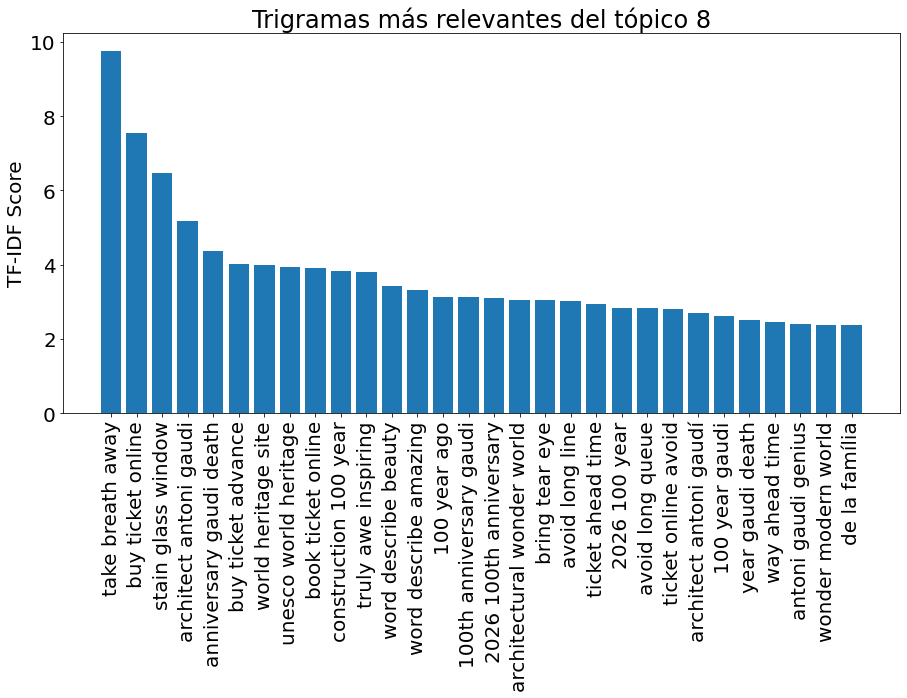

In [ ]:
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
df_results_tri=pd.DataFrame.from_dict(results_sorted_tri).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_tri[0],df_results_tri[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Trigramas más relevantes del tópico 8')

In [ ]:
## Obtain trigrams for topic 9
topic_9 = df_model[df_model['topic_dominant']==8] 
dft=topic_9['lemmas']
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft)
names_tri= tfIdfVectorizer_tri.get_feature_names_out()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri = dict(zip(names_tri, freqs_tri))

from operator import itemgetter
i = 0
results_sorted=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

stain glass window 55.8175755181074
light stain glass 12.573850410108701
come stain glass 11.186084940872961
beautiful stain glass 10.494403786299696
shine stain glass 8.40913150178714
buy ticket online 8.196190527091852
light come stain 8.1722249332999
colour stain glass 7.250378500844008
glass window beautiful 7.031520629883072
take breath away 6.8980097219313325


Text(0.5, 1.0, 'Trigramas más relevantes del tópico 9')

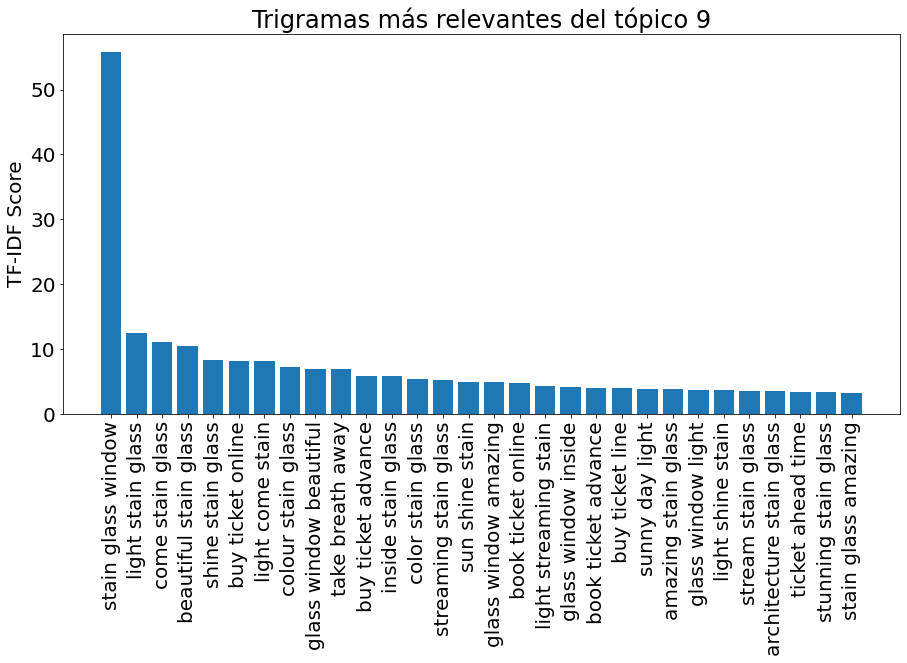

In [ ]:
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
df_results_tri=pd.DataFrame.from_dict(results_sorted_tri).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_tri[0],df_results_tri[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Trigramas más relevantes del tópico 9')

In [ ]:
## Obtain trigrams for topic 10
topic_10 = df_model[df_model['topic_dominant']==9] 
dft=topic_10['lemmas']
tfIdfVectorizer_tri=TfidfVectorizer(use_idf=True, ngram_range=(3,3))
tfIdf_tri = tfIdfVectorizer_tri.fit_transform(dft)
names_tri= tfIdfVectorizer_tri.get_feature_names_out()
freqs_tri = tfIdf_tri.sum(axis=0).A1
result_tri = dict(zip(names_tri, freqs_tri))

from operator import itemgetter
i = 0
results_sorted=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
for key, value in results_sorted:
    i += 1
    if i == 11:
      break
    print(key, value)

stain glass window 11.665241258023562
amazing piece architecture 10.621522822512949
buy ticket online 9.41825394741377
construction 100 year 9.347006105678187
visit year ago 9.203435245039353
10 year ago 9.022026429475755
definitely worth visit 8.745562745758674
amazing place visit 8.168396696708664
100 year ago 7.120202225705019
great place visit 6.060152363975504


Text(0.5, 1.0, 'Trigramas más relevantes del tópico 10')

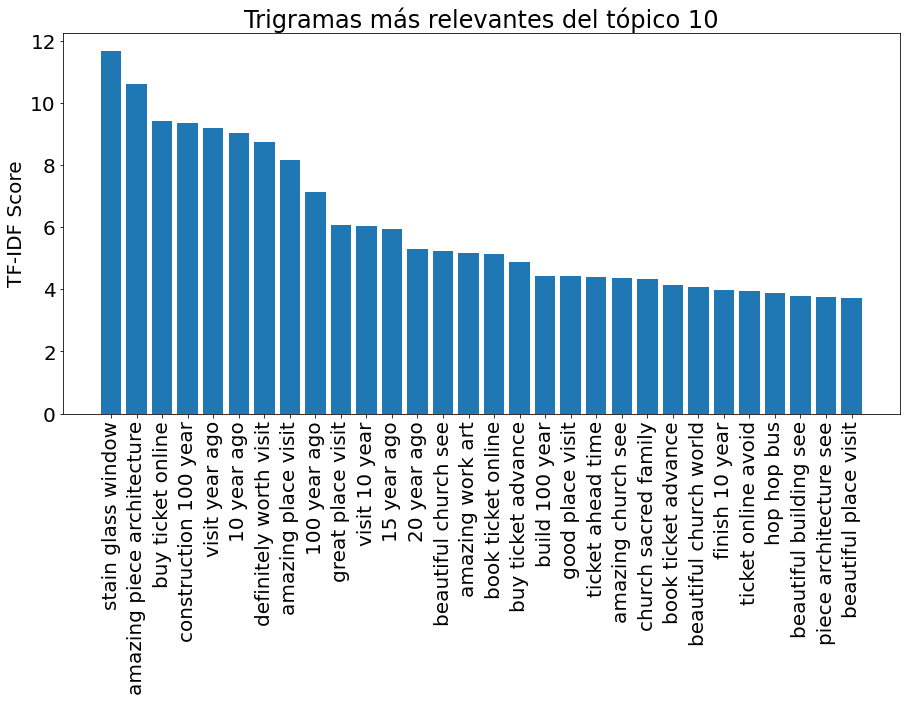

In [ ]:
results_sorted_tri=sorted(result_tri.items(), key = itemgetter(1), reverse = True)
df_results_tri=pd.DataFrame.from_dict(results_sorted_tri).head(30)
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,7))
plt.bar(df_results_tri[0],df_results_tri[1])
plt.xticks(rotation=90)
plt.ylabel('TF-IDF Score')
plt.title('Trigramas más relevantes del tópico 10')

# Análisis de Sentimientos


In [ ]:
# Load data
df_sentiment = pd.read_csv('Turismo_complete.csv', index_col=False)
df_topics=pd.read_csv('topic_model_results.csv', index_col=False)

In [ ]:
df_sentiment ['cleaned_text']=df_sentiment['titleopinion']
df_sentiment

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1           id       username  \
0               0             0            1123  rn433412187     Neema46664   
1               1             1            1124  rn433409288         dakane   
2               2             3            1126  rn433394480         kaci99   
3               3             4            1127  rn433387404         suzmca   
4               4             5            1128  rn433386341  PortneufSusan   
...           ...           ...             ...          ...            ...   
37338       37338         43529           44886  rn112573495       BrianUSN   
37339       37339         43530           44887  rn112166337     Bedazzle76   
37340       37340         43531           44888  rn111416892      rspeters7   
37341       37341         43532           44889  rn110378448   stripeyshirt   
37342       37342         43533           44890  rn110339693     richnterry   

                        location       userop  \
0      San Francisco, California  180 reviews   
1           Pacifica, California   10 reviews   
2                    San Jose CA   21 reviews   
3             Nipomo, California  292 reviews   
4                       Portneuf    7 reviews   
...                          ...          ...   
37338         San Antonio, Texas   33 reviews   
37339     Mumbai (Bombay), India   71 reviews   
37340           Cincinnati, Ohio   52 reviews   
37341      Leeds, United Kingdom   17 reviews   
37342      Jacksonville, Florida   64 reviews   

                                             quote  rating        date  \
0                                 Amazing amazing        5  2016-10-31   
1                      Impressive but very crowded       3  2016-10-31   
2                                   Awe inspiring.       4  2016-10-31   
3                                        Beautiful       5  2016-10-31   
4                                A memorable visit       5  2016-10-31   
...                                            ...     ...         ...   
37338   Unique Cathedral - A Must See in Barcelona       5  2011-06-10   
37339                          Absolutely Stunning       5  2011-06-08   
37340                        Awe Inspiring Beauty!       5  2011-06-04   
37341  An astonishing piece of church architecture       5  2011-05-29   
37342          If You Do Nothing Else In Barcelona       5  2011-05-29   

                                           reviewnospace  page  \
0      Go see it - you won't regret and best advice, ...   113   
1      I found the Sagrada Familia to be impressive b...   113   
2      Amazing. Of course this is a must when in Barc...   113   
3      We purchased tickets on the internet to see th...   113   
4      The exterior is quite something, but you have ...   113   
...                                                  ...   ...   
37338  The Cathedral is not near many other big attra...  4488   
37339  If you have to do one thing in Barcelona, it h...  4488   
37340  From our Hotel we took the bus downtown to Bar...  4488   
37341  Go to see the Cathedral before you've seen any...  4488   
37342  First, whatever you do book your tickets on-li...  4488   

                                            titleopinion  Numero de palabras  \
0      Amazing amazing . Go see it - you won't regret...                  29   
1      Impressive but very crowded. I found the Sagra...                  40   
2      Awe inspiring.. Amazing. Of course this is a m...                  36   
3      Beautiful. We purchased tickets on the interne...                  83   
4      A memorable visit. The exterior is quite somet...                  30   
...                                                  ...                 ...   
37338  Unique Cathedral - A Must See in Barcelona. Th...                 164   
37339  Absolutely Stunning. If you have to do one thi...                 163   
37340  Awe Inspiring Beauty!. From our Hotel we took ...           

In [ ]:
# Select the colums needed from the dataset
df_topics= df_topics.iloc[:,[1,2,3,4]]
df_topics

lemmas  \
0      amazing amazing regret good advice early morni...   
1      impressive crowded find impressive crowded go ...   
2      awe inspiring amazing course time visit crowd ...   
3      beautiful purchase ticket internet interior ba...   
4      memorable visit exterior inside finish chef d'...   
...                                                  ...   
37338  unique cathedral cathedral near big attraction...   
37339  absolutely stunning thing la long time think f...   
37340  awe inspiring beauty hotel take bus downtown t...   
37341  astonishing piece church architecture cathedra...   
37342  book ticket line print home simple save time f...   

                                                  tokens  \
0      ['amazing', 'amazing', 'regret', 'good', 'advi...   
1      ['impressive', 'crowded', 'find', 'impressive'...   
2      ['awe', 'inspiring', 'amazing', 'course', 'tim...   
3      ['beautiful', 'purchase', 'ticket', 'internet'...   
4      ['memorable', 'visit', 'exterior', 'inside', '...   
...                                                  ...   
37338  ['unique', 'cathedral', 'cathedral', 'near', '...   
37339  ['absolutely', 'stunning', 'thing', 'la', 'lon...   
37340  ['awe', 'inspiring', 'beauty', 'hotel', 'take'...   
37341  ['astonishing', 'piece', 'church', 'architectu...   
37342  ['book', 'ticket', 'line', 'print', 'home', 's...   

                                            lda_features  topic_dominant  
0      [0.61423147 0.22147785 0.00769519 0.11043359 0...               0  
1      [0.00769322 0.68084061 0.00769472 0.00769359 0...               1  
2      [0.00769433 0.19275609 0.58199954 0.00769337 0...               2  
3      [0.59131032 0.00322645 0.00322738 0.14151201 0...               0  
4      [0.00909238 0.00909388 0.25555268 0.00909234 0...               9  
...                                                  ...             ...  
37338  [0.00166719 0.22432202 0.00166706 0.03863458 0...               4  
37339  [0.00158761 0.00158766 0.12101607 0.19784993 0...               7  
37340  [0.00163965 0.20266277 0.21556701 0.07734875 0...               7  
37341  [0.03637228 0.19714552 0.11740067 0.04161865 0...               9  
37342  [0.21038491 0.1078679  0.06008105 0.08239646 0...               0  

[37343 rows x 4 columns]

In [ ]:
# Merge in one df all the information needed
df_topics_complete=pd.merge(df_sentiment,df_topics,on='lemmas',how='left')
df_topics_complete

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1           id       username  \
0               0             0            1123  rn433412187     Neema46664   
1               1             1            1124  rn433409288         dakane   
2               2             3            1126  rn433394480         kaci99   
3               3             4            1127  rn433387404         suzmca   
4               4             5            1128  rn433386341  PortneufSusan   
...           ...           ...             ...          ...            ...   
37340       37338         43529           44886  rn112573495       BrianUSN   
37341       37339         43530           44887  rn112166337     Bedazzle76   
37342       37340         43531           44888  rn111416892      rspeters7   
37343       37341         43532           44889  rn110378448   stripeyshirt   
37344       37342         43533           44890  rn110339693     richnterry   

                        location       userop  \
0      San Francisco, California  180 reviews   
1           Pacifica, California   10 reviews   
2                    San Jose CA   21 reviews   
3             Nipomo, California  292 reviews   
4                       Portneuf    7 reviews   
...                          ...          ...   
37340         San Antonio, Texas   33 reviews   
37341     Mumbai (Bombay), India   71 reviews   
37342           Cincinnati, Ohio   52 reviews   
37343      Leeds, United Kingdom   17 reviews   
37344      Jacksonville, Florida   64 reviews   

                                             quote  rating        date  \
0                                 Amazing amazing        5  2016-10-31   
1                      Impressive but very crowded       3  2016-10-31   
2                                   Awe inspiring.       4  2016-10-31   
3                                        Beautiful       5  2016-10-31   
4                                A memorable visit       5  2016-10-31   
...                                            ...     ...         ...   
37340   Unique Cathedral - A Must See in Barcelona       5  2011-06-10   
37341                          Absolutely Stunning       5  2011-06-08   
37342                        Awe Inspiring Beauty!       5  2011-06-04   
37343  An astonishing piece of church architecture       5  2011-05-29   
37344          If You Do Nothing Else In Barcelona       5  2011-05-29   

                                           reviewnospace  page  \
0      Go see it - you won't regret and best advice, ...   113   
1      I found the Sagrada Familia to be impressive b...   113   
2      Amazing. Of course this is a must when in Barc...   113   
3      We purchased tickets on the internet to see th...   113   
4      The exterior is quite something, but you have ...   113   
...                                                  ...   ...   
37340  The Cathedral is not near many other big attra...  4488   
37341  If you have to do one thing in Barcelona, it h...  4488   
37342  From our Hotel we took the bus downtown to Bar...  4488   
37343  Go to see the Cathedral before you've seen any...  4488   
37344  First, whatever you do book your tickets on-li...  4488   

                                            titleopinion  Numero de palabras  \
0      Amazing amazing . Go see it - you won't regret...                  29   
1      Impressive but very crowded. I found the Sagra...                  40   
2      Awe inspiring.. Amazing. Of course this is a m...                  36   
3      Beautiful. We purchased tickets on the interne...                  83   
4      A memorable visit. The exterior is quite somet...                  30   
...                                                  ...                 ...   
37340  Unique Cathedral - A Must See in Barcelona. Th...                 164   
37341  Absolutely Stunning. If you have to do one thi...                 163   
37342  Awe Inspiring Beauty!. From our Hotel we took ...           

In [ ]:
# Tokenize the data
def tokenize(text):
    text = str(text)
    tokens = text.split() 
    return tokens
df_topics_complete ['tokens'] = df_topics_complete['cleaned_text'].apply(tokenize)
print(df_topics_complete.head())

   Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1           id       username  \
0           0             0            1123  rn433412187     Neema46664   
1           1             1            1124  rn433409288         dakane   
2           2             3            1126  rn433394480         kaci99   
3           3             4            1127  rn433387404         suzmca   
4           4             5            1128  rn433386341  PortneufSusan   

                    location       userop                        quote  \
0  San Francisco, California  180 reviews             Amazing amazing    
1       Pacifica, California   10 reviews  Impressive but very crowded   
2                San Jose CA   21 reviews               Awe inspiring.   
3         Nipomo, California  292 reviews                    Beautiful   
4                   Portneuf    7 reviews            A memorable visit   

   rating        date                                      reviewnospace  \
0       5  2016-10-31  Go se

In [ ]:
# Funtion to analyze the score
def tweet_scores(data_frame): 
  
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
    scores = []
    n = data_frame.shape[0]
    for i in range(n):
      sentence = data_frame.iloc[i]
      sentiment_dict = sid_obj.polarity_scores(sentence)
      compound = sentiment_dict['compound']
      scores.append(compound)
    return scores


In [ ]:
# Apply the previous function to our data
df_topics_complete['scores']=tweet_scores(df_topics_complete['cleaned_text'])

In [ ]:
df_topics_complete
# Save the data to csv
df_topics_complete.to_csv('SF_Sentiment_Analisis_complete')

In [ ]:
# Make sure all date type data is in the same format 
df_topics_complete['date_2'] = df_sentiment['date'].astype('datetime64[ns]')

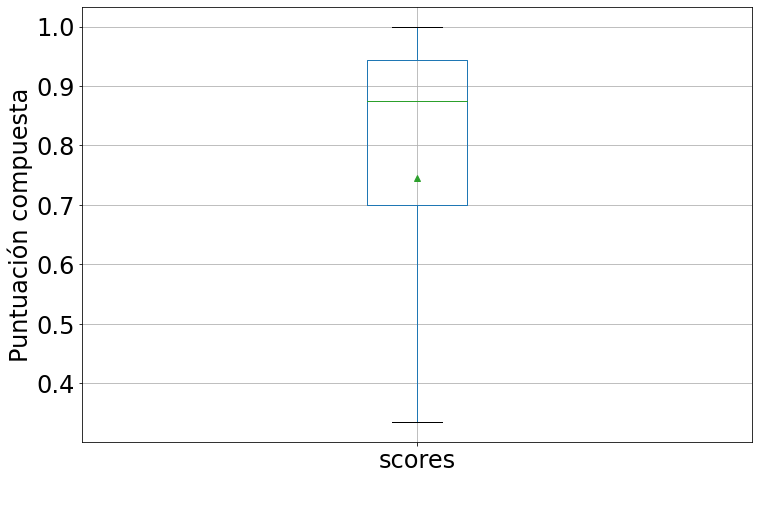

In [ ]:
# Boxplot of the compound score obtained

df_topics_complete = pd.read_csv('SF_Sentiment_Analisis_complete', index_col=False)
ax1 = df_topics_complete.boxplot(column='scores', figsize=(12,8), showmeans=True, showfliers=False, fontsize=24) #~eliminate outliers
ax1.set_ylabel('Puntuación compuesta', fontsize=24)
ax1.set_xlabel(' ', fontsize=24)
plt.show() 

In [ ]:
# Describe the data obtained
df_topics_complete['scores'].describe()

count    37345.000000
mean         0.744608
std          0.333639
min         -0.978400
25%          0.699600
50%          0.874700
75%          0.943200
max          0.999900
Name: scores, dtype: float64

In [ ]:
# Group the scores per date
df_bygroup=pd.DataFrame(df_topics_complete.groupby(['date_2'])['scores'].agg('sum'))

In [ ]:
# Index and save the data
df_bygroup['date']=df_bygroup.index

df_bygroup.to_csv('Turismo_SA_dates.csv')
df_bygroup

scores       date
date_2                        
2011-05-29   1.9400 2011-05-29
2011-06-04   0.9801 2011-06-04
2011-06-08   0.8822 2011-06-08
2011-06-10   0.9335 2011-06-10
2011-06-11   0.7852 2011-06-11
...             ...        ...
2016-10-27  33.3438 2016-10-27
2016-10-28  28.9641 2016-10-28
2016-10-29  18.5045 2016-10-29
2016-10-30  24.7854 2016-10-30
2016-10-31  22.7306 2016-10-31

[1941 rows x 2 columns]

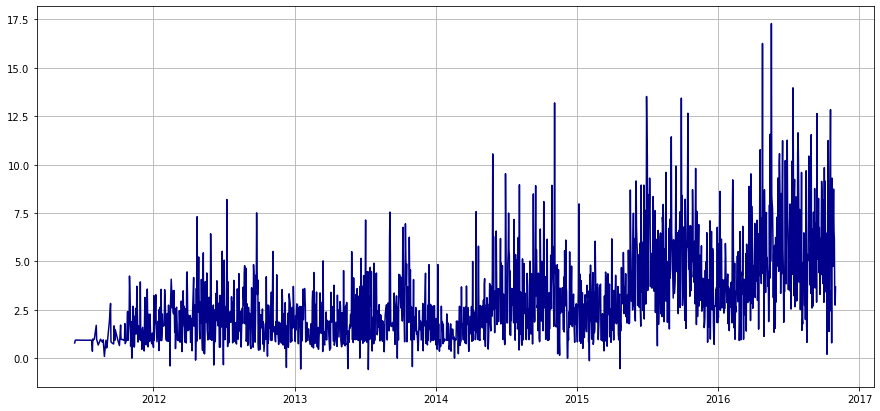

In [ ]:
# Show sentiment evolution
plt.figure(figsize=(15,7))
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df_bygroup['date'],df_bygroup['scores'],color="darkblue")

plt.grid()
plt.show()

In [ ]:
# Describe the compound score data
df_topics_complete['scores'].describe()

count    37345.000000
mean         0.744608
std          0.333639
min         -0.978400
25%          0.699600
50%          0.874700
75%          0.943200
max          0.999900
Name: scores, dtype: float64

# Gráficos por tópico


In [ ]:
# Obtain the evolution of the sentiment through the years for topic 1
topic_1_sentiment = df_topics_complete[df_topics_complete['topic_dominant']==0] 
topic_1_sentiment = topic_1_sentiment[topic_1_sentiment.date_2.notnull()]
df_bygroup=pd.DataFrame(topic_1_sentiment.groupby(['date_2'])['scores'].agg('sum'))
df_bygroup['date']=df_bygroup.index
df_bygroup.to_csv('Turismo_SA_dates_1.csv')
df_bygroup

scores       date
date_2                       
2011-07-06  1.9093 2011-07-06
2011-08-08  1.7971 2011-08-08
2011-08-11  2.8586 2011-08-11
2011-08-14  0.7088 2011-08-14
2011-08-18  0.8420 2011-08-18
...            ...        ...
2016-10-27  6.4108 2016-10-27
2016-10-28  4.1817 2016-10-28
2016-10-29  4.8081 2016-10-29
2016-10-30  3.5123 2016-10-30
2016-10-31  7.0850 2016-10-31

[1670 rows x 2 columns]

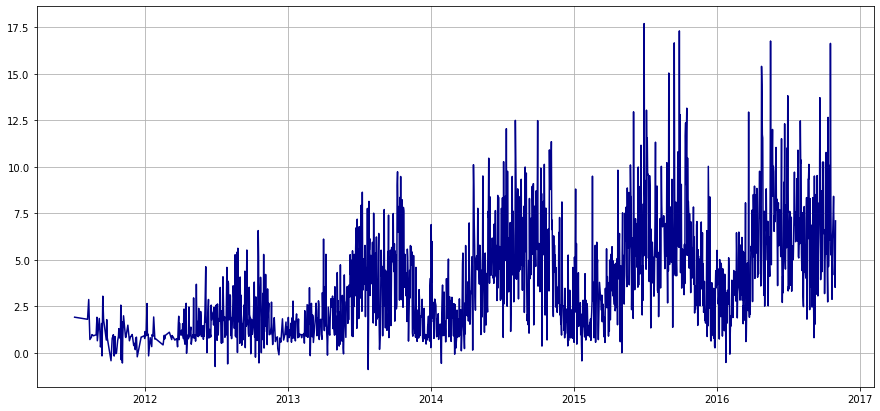

In [ ]:
plt.figure(figsize=(15,7))
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df_bygroup['date'],df_bygroup['scores'],color="darkblue")

#plt.set_ylim([0,140000])
plt.grid()
plt.show()

In [ ]:
# Obtain the evolution of the sentiment through the years for topic 2
topic_2_sentiment = df_topics_complete[df_topics_complete['topic_dominant']==1] 
topic_2_sentiment = topic_2_sentiment[topic_2_sentiment.date_2.notnull()]
df_bygroup=pd.DataFrame(topic_2_sentiment.groupby(['date_2'])['scores'].agg('sum'))
df_bygroup['date']=df_bygroup.index
df_bygroup.to_csv('Turismo_SA_dates_2.csv')
df_bygroup

scores       date
date_2                       
2011-06-20  0.8718 2011-06-20
2011-06-25  0.9134 2011-06-25
2011-06-27  0.9569 2011-06-27
2011-06-30  0.8169 2011-06-30
2011-07-06 -0.4082 2011-07-06
...            ...        ...
2016-10-25  0.2023 2016-10-25
2016-10-26  1.3313 2016-10-26
2016-10-27  2.6365 2016-10-27
2016-10-30  4.0165 2016-10-30
2016-10-31  0.1140 2016-10-31

[1109 rows x 2 columns]

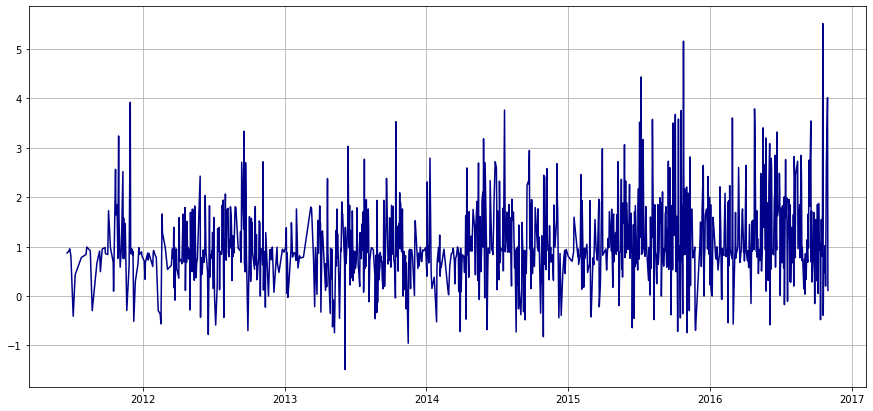

In [ ]:
plt.figure(figsize=(15,7))
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df_bygroup['date'],df_bygroup['scores'],color="darkblue")

#plt.set_ylim([0,140000])
plt.grid()
plt.show()

In [ ]:
# Obtain the evolution of the sentiment through the years for topic 3
topic_3_sentiment = df_topics_complete[df_topics_complete['topic_dominant']==2] 
topic_3_sentiment = topic_3_sentiment[topic_3_sentiment.date_2.notnull()]
df_bygroup=pd.DataFrame(topic_3_sentiment.groupby(['date_2'])['scores'].agg('sum'))
df_bygroup['date']=df_bygroup.index
df_bygroup.to_csv('Turismo_SA_dates_3.csv')
df_bygroup

scores       date
date_2                       
2011-06-16  0.9019 2011-06-16
2011-06-19  0.9718 2011-06-19
2011-06-23  0.8669 2011-06-23
2011-06-28  0.9206 2011-06-28
2011-07-12  0.9356 2011-07-12
...            ...        ...
2016-10-27  4.2261 2016-10-27
2016-10-28  4.0350 2016-10-28
2016-10-29  0.9439 2016-10-29
2016-10-30  3.2992 2016-10-30
2016-10-31  2.8152 2016-10-31

[1713 rows x 2 columns]

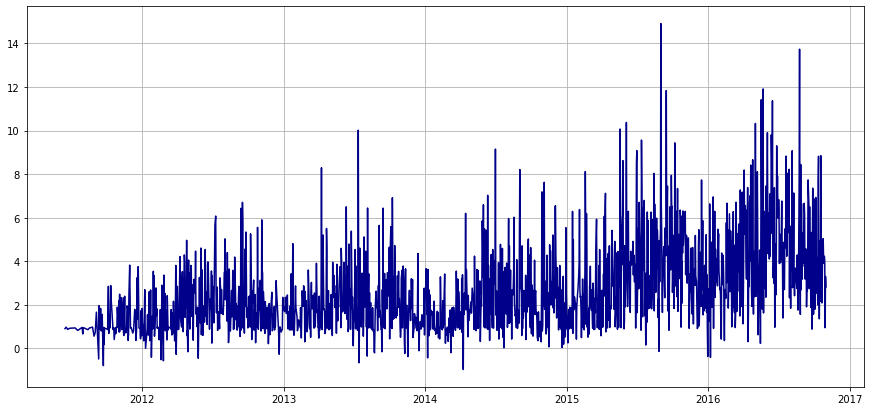

In [ ]:
plt.figure(figsize=(15,7))
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df_bygroup['date'],df_bygroup['scores'],color="darkblue")

#plt.set_ylim([0,140000])
plt.grid()
plt.show()

In [ ]:
# Obtain the evolution of the sentiment through the years for topic 4
topic_4_sentiment = df_topics_complete[df_topics_complete['topic_dominant']==3] 
topic_4_sentiment = topic_4_sentiment[topic_4_sentiment.date_2.notnull()]
df_bygroup=pd.DataFrame(topic_4_sentiment.groupby(['date_2'])['scores'].agg('sum'))
df_bygroup['date']=df_bygroup.index
df_bygroup.to_csv('Turismo_SA_dates_4.csv')
df_bygroup

scores       date
date_2                       
2011-06-21  0.9561 2011-06-21
2011-07-03  0.6442 2011-07-03
2011-07-25  0.7964 2011-07-25
2011-07-28  0.6980 2011-07-28
2011-08-07  0.9062 2011-08-07
...            ...        ...
2016-10-27  0.8997 2016-10-27
2016-10-28  1.7165 2016-10-28
2016-10-29  0.8313 2016-10-29
2016-10-30  0.8000 2016-10-30
2016-10-31  0.6398 2016-10-31

[955 rows x 2 columns]

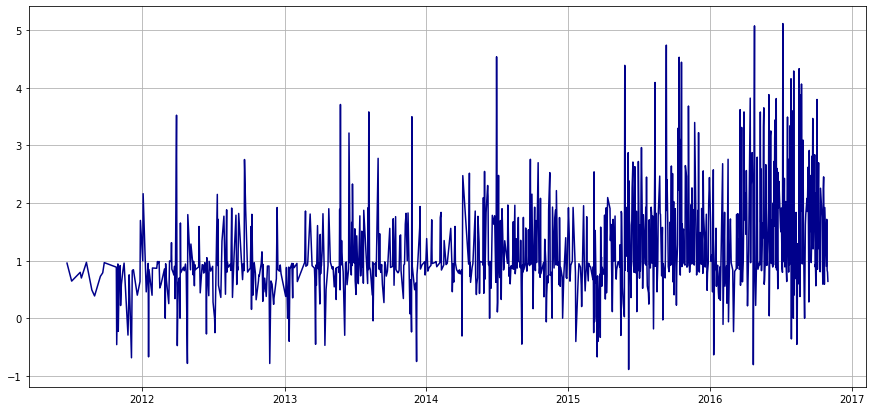

In [ ]:
plt.figure(figsize=(15,7))
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df_bygroup['date'],df_bygroup['scores'],color="darkblue")

#plt.set_ylim([0,140000])
plt.grid()
plt.show()

In [ ]:
# Obtain the evolution of the sentiment through the years for topic 5
topic_5_sentiment = df_topics_complete[df_topics_complete['topic_dominant']==4] 
topic_5_sentiment = topic_5_sentiment[topic_5_sentiment.date_2.notnull()]
df_bygroup=pd.DataFrame(topic_5_sentiment.groupby(['date_2'])['scores'].agg('sum'))
df_bygroup['date']=df_bygroup.index
df_bygroup.to_csv('Turismo_SA_dates_5.csv')
df_bygroup

scores       date
date_2                       
2011-06-04  0.9801 2011-06-04
2011-06-16  0.3818 2011-06-16
2011-06-21  0.9801 2011-06-21
2011-08-02  0.7717 2011-08-02
2011-08-15  0.0000 2011-08-15
...            ...        ...
2016-10-26  0.9571 2016-10-26
2016-10-27  1.6740 2016-10-27
2016-10-29  0.8443 2016-10-29
2016-10-30  0.9354 2016-10-30
2016-10-31  1.3119 2016-10-31

[694 rows x 2 columns]

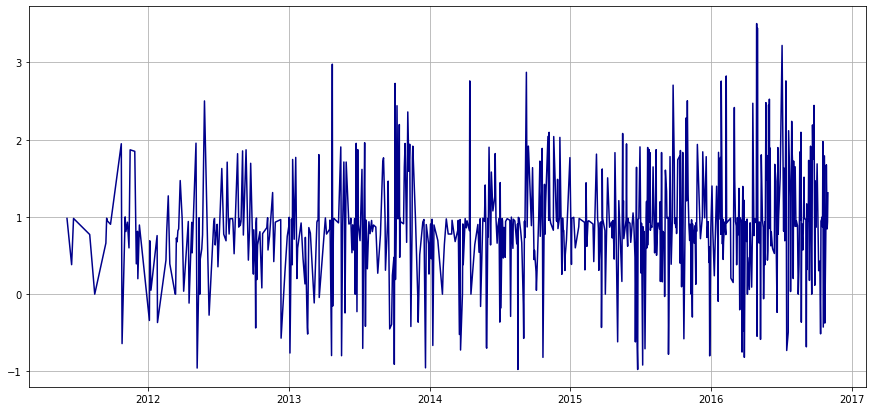

In [ ]:
plt.figure(figsize=(15,7))
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df_bygroup['date'],df_bygroup['scores'],color="darkblue")

#plt.set_ylim([0,140000])
plt.grid()
plt.show()

In [ ]:
# Obtain the evolution of the sentiment through the years for topic 6
topic_6_sentiment = df_topics_complete[df_topics_complete['topic_dominant']==5] 
topic_6_sentiment = topic_6_sentiment[topic_6_sentiment.date_2.notnull()]
df_bygroup=pd.DataFrame(topic_6_sentiment.groupby(['date_2'])['scores'].agg('sum'))
df_bygroup['date']=df_bygroup.index
df_bygroup.to_csv('Turismo_SA_dates_6.csv')
df_bygroup

scores       date
date_2                       
2011-07-24  0.8859 2011-07-24
2011-08-14  0.9226 2011-08-14
2011-08-18  0.9714 2011-08-18
2011-08-21  0.9169 2011-08-21
2011-09-08  0.8848 2011-09-08
...            ...        ...
2016-10-22  1.7918 2016-10-22
2016-10-24  1.8861 2016-10-24
2016-10-26  2.9154 2016-10-26
2016-10-27  0.5137 2016-10-27
2016-10-30  2.5857 2016-10-30

[681 rows x 2 columns]

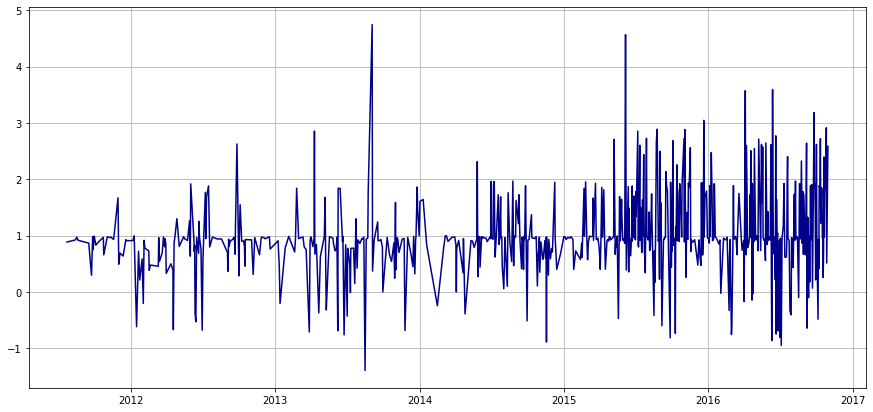

In [ ]:
plt.figure(figsize=(15,7))
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df_bygroup['date'],df_bygroup['scores'],color="darkblue")

#plt.set_ylim([0,140000])
plt.grid()
plt.show()

In [ ]:
# Obtain the evolution of the sentiment through the years for topic 7
topic_7_sentiment = df_topics_complete[df_topics_complete['topic_dominant']==6] 
topic_7_sentiment = topic_7_sentiment[topic_7_sentiment.date_2.notnull()]
df_bygroup=pd.DataFrame(topic_7_sentiment.groupby(['date_2'])['scores'].agg('sum'))
df_bygroup['date']=df_bygroup.index
df_bygroup.to_csv('Turismo_SA_dates_7.csv')
df_bygroup

scores       date
date_2                       
2011-07-02  0.9928 2011-07-02
2011-07-03  0.9167 2011-07-03
2011-07-28  0.9395 2011-07-28
2011-07-29  0.9851 2011-07-29
2011-08-23  0.8550 2011-08-23
...            ...        ...
2016-10-27  0.8011 2016-10-27
2016-10-28  6.0075 2016-10-28
2016-10-29  4.2119 2016-10-29
2016-10-30  0.6249 2016-10-30
2016-10-31  1.2703 2016-10-31

[1052 rows x 2 columns]

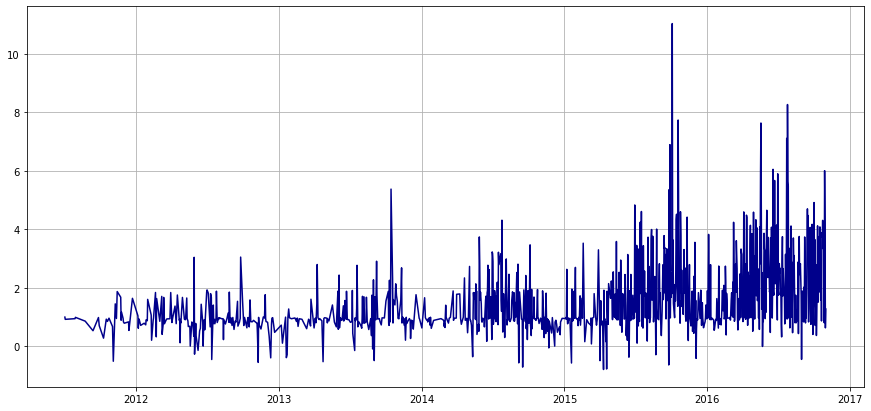

In [ ]:
plt.figure(figsize=(15,7))
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df_bygroup['date'],df_bygroup['scores'],color="darkblue")

#plt.set_ylim([0,140000])
plt.grid()
plt.show()

In [ ]:
# Obtain the evolution of the sentiment through the years for topic 8
topic_8_sentiment = df_topics_complete[df_topics_complete['topic_dominant']==7] 
topic_8_sentiment = topic_8_sentiment[topic_8_sentiment.date_2.notnull()]
df_bygroup=pd.DataFrame(topic_8_sentiment.groupby(['date_2'])['scores'].agg('sum'))
df_bygroup['date']=df_bygroup.index
df_bygroup.to_csv('Turismo_SA_dates_8.csv')
df_bygroup

scores       date
date_2                       
2011-05-29  1.9400 2011-05-29
2011-06-08  0.8822 2011-06-08
2011-06-16  0.8016 2011-06-16
2011-06-26  0.8240 2011-06-26
2011-07-02  0.9716 2011-07-02
...            ...        ...
2016-10-27  4.6765 2016-10-27
2016-10-28  3.2693 2016-10-28
2016-10-29  1.3789 2016-10-29
2016-10-30  1.8814 2016-10-30
2016-10-31  3.9058 2016-10-31

[1518 rows x 2 columns]

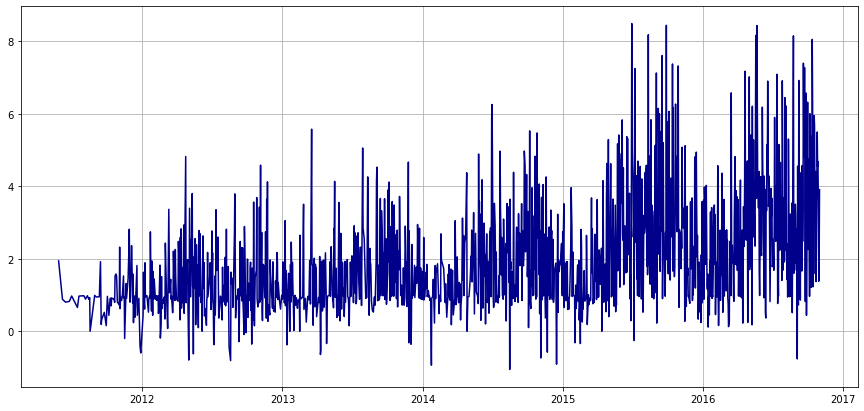

In [ ]:
plt.figure(figsize=(15,7))
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df_bygroup['date'],df_bygroup['scores'],color="darkblue")

#plt.set_ylim([0,140000])
plt.grid()
plt.show()

In [ ]:
# Obtain the evolution of the sentiment through the years for topic 9
topic_9_sentiment = df_topics_complete[df_topics_complete['topic_dominant']==8] 
topic_9_sentiment = topic_9_sentiment[topic_9_sentiment.date_2.notnull()]
df_bygroup=pd.DataFrame(topic_9_sentiment.groupby(['date_2'])['scores'].agg('sum'))
df_bygroup['date']=df_bygroup.index
df_bygroup.to_csv('Turismo_SA_dates_9.csv')
df_bygroup

scores       date
date_2                       
2011-06-10  0.9335 2011-06-10
2011-06-14  0.9587 2011-06-14
2011-06-15  0.7183 2011-06-15
2011-06-30  0.3071 2011-06-30
2011-07-25  0.9497 2011-07-25
...            ...        ...
2016-10-27  4.8965 2016-10-27
2016-10-28  3.6402 2016-10-28
2016-10-29  2.6606 2016-10-29
2016-10-30  4.3898 2016-10-30
2016-10-31  1.9121 2016-10-31

[1385 rows x 2 columns]

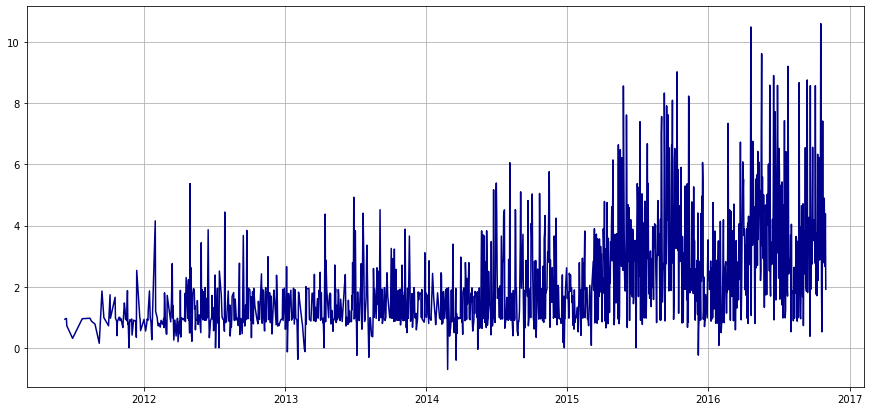

In [ ]:
plt.figure(figsize=(15,7))
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df_bygroup['date'],df_bygroup['scores'],color="darkblue")

#plt.set_ylim([0,140000])
plt.grid()
plt.show()

In [ ]:
# Obtain the evolution of the sentiment through the years for topic 10
topic_10_sentiment = df_topics_complete[df_topics_complete['topic_dominant']==9] 
topic_10_sentiment = topic_10_sentiment[topic_10_sentiment.date_2.notnull()]
df_bygroup=pd.DataFrame(topic_10_sentiment.groupby(['date_2'])['scores'].agg('sum'))
df_bygroup['date']=df_bygroup.index
df_bygroup.to_csv('Turismo_SA_dates_10.csv')
df_bygroup

scores       date
date_2                       
2011-06-11  0.7852 2011-06-11
2011-06-13  0.9349 2011-06-13
2011-07-03  0.9273 2011-07-03
2011-07-25  0.9276 2011-07-25
2011-07-27  0.3591 2011-07-27
...            ...        ...
2016-10-27  6.6089 2016-10-27
2016-10-28  6.1139 2016-10-28
2016-10-29  2.8255 2016-10-29
2016-10-30  2.7402 2016-10-30
2016-10-31  3.6765 2016-10-31

[1723 rows x 2 columns]

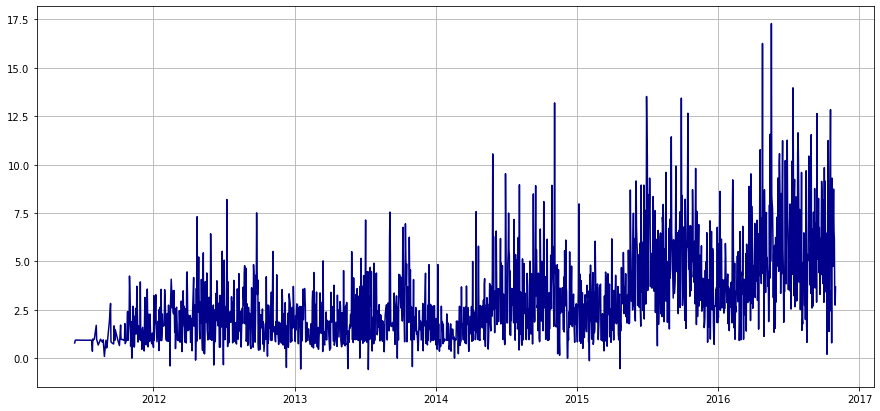

In [ ]:
plt.figure(figsize=(15,7))
plt.rcParams['agg.path.chunksize'] = 10000
plt.plot(df_bygroup['date'],df_bygroup['scores'],color="darkblue")

#plt.set_ylim([0,140000])
plt.grid()
plt.show()